# GAFA stock prices: Exploratory and predictive analysis

Introduction<p>

1. Exploratory data analysis<br>
  1.1. GAFA stock prices 2013-2019<br>
      1.1.1. Data download<br>
      1.1.2. GAFA stock price visualization<br>
      1.1.3. A deeper look: GAFA Daily stock price difference<br>
      1.1.4. Data decomposition<p>
      
  1.2. Stock market Indexes  2013-2019 analysis<br>
      1.2.1. Indexes data download<br>
      1.2.2. Indexes exploratory analysis<br>
      1.2.3. A deeper look: Indexes Daily stock price difference<p>
    
  1.3. GAFA & Indexes stock prices analysis <br>
      1.3.1. Stock prices correlation<br>
      1.3.2. Rolling windows<br>
      1.3.3. Variance<br>
                
  1.4. GAFA Market Capitalisation 2013-2019<br>
      1.4.1. Data download<br>
      1.4.2. First look at GAFA's market capitalisation<br>
      1.4.3. Correlation<br>
       
  1.5. Data cleaning <br>
  
  1.6. Normalising data & ROI <br>
      1.6.1. Patterns of normalised data<br>
      1.6.2. Return on investments and Market capitalisation growth<br>
    
  1.7. GAFA Web&Mobile users in the world 2013-Q1 2019<br>
      1.7.1. Download and transpose the data<br>
      1.7.2. Exploratory analysis<br>
      1.7.3. Mobile users & Internet users data manipulating<br>
      
      <p>
    
2. Stock prices predictive modelling<br>
  2.1. Features engineering<br>
  
  2.2. Model 1<br>
  
  2.3. Model 2<br>
  
  2.4. Prophet<p>
    
Conclusion


## Introduction

<b>GAFA</b> - four leading world internet companies - <b>Google(Alphabet), Apple, Facebook, Amazon</b> has grown rapidly during several last years and become one of the most expensive companies worldwide.

This project is focused on analysing its stock market performance as well as market capitalisations data. To have a bigger picture of a stock market three main indexes - S&P500, DowJones and NASDAQ - are also analysed. To enlarge the view on GAFA results it is proposed to look at data related to Internet users and mobile users in the world which could be one of the factors ot these companies success.

<b>First part</b> of the project is dedicated to exploratory analysis of stock market prices, indexes, market capitalisation data and Internet&mobile users.

In the <b>second part</b> several predictive models are developped to predict GAGA's future stock prices.


<b>Data sources:</b><br>
1. Stock information: Daily GAFA stock prices and volume.
2. Stock information: Daily stock Indexes prices and volume.
3. GAFA financial data: Daily Market Capitalisation.
4. Market data: Number of Internet & Mobile users in the world by regions. The succes of these companies is due also to the growth of internet&web users, so it seems reasonable to take into account these data to develop predictive models.

 



## PART I. Exploratory analysis

In [1]:
# Download all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


### 1.1. GAFA stock prices 2013 - 2019 (January - April) analysis

#### 1.1.1. Data download
- Data source: stock prices data on YahooFinance, data are provided in csv format.
- Period choosen: 6 last years from 2013 till 2018 (full years) plus the beginning of 2019 (January-April) is added to make the analysis as more up to date as possible.
- Data are downloaded separately for each company: Google, Apple, Facebook, Amazon.
- From all data provided by Yahoo Finance three most relevant features are kept: Date, Volume, Close ( i. e. close price).
- Column 'Data' is set as dataframe index and converted into datetime type data.
- Features are renamed to facilitate further data manipulating.
- Downloaded data into Pandas DataFrame are checked with head/tail method.


In [2]:
#GAFA stock data download

# Download Google stock prices into Pandas DataFrame

df_G = pd.read_csv('GOOG_daily_2013_2019.csv')
df_G = df_G[['Date', 'Close', 'Volume']].set_index('Date')
df_G.rename(columns={'Close':'Close Google', 'Volume':'Volume Google'}, inplace=True)
df_G.index = pd.to_datetime(df_G.index)
print(df_G.head())
print(df_G.tail())


# Download Apple stock prices into Pandas DataFrame

df_AP = pd.read_csv('AAPL_daily_2013-2019.csv')

df_AP = df_AP[['Date', 'Close', 'Volume']].set_index('Date')
df_AP.rename(columns={'Close':'Close Apple', 'Volume':'Volume Apple'}, inplace=True)
df_AP.index = pd.to_datetime(df_AP.index)
print(df_AP.head())
print(df_AP.tail())


            Close Google  Volume Google
Date                                   
2013-01-02    359.288177        5115500
2013-01-03    359.496826        4666500
2013-01-04    366.600616        5562800
2013-01-07    365.001007        3332900
2013-01-08    364.280701        3373900
            Close Google  Volume Google
Date                                   
2019-04-24   1256.000000        1018800
2019-04-25   1263.449951        1107300
2019-04-26   1272.180054        1241400
2019-04-29   1287.579956        2499400
2019-04-30   1188.479980        6207000
            Close Apple  Volume Apple
Date                                 
2013-01-02    78.432854     140129500
2013-01-03    77.442856      88241300
2013-01-04    75.285713     148583400
2013-01-07    74.842857     121039100
2013-01-08    75.044289     114676800
            Close Apple  Volume Apple
Date                                 
2019-04-24   207.160004      17540600
2019-04-25   205.279999      18543200
2019-04-26   204.30000

In [3]:
# Download  Facebook stock prices into Pandas DataFrame

df_FB = pd.read_csv('FB_daily_2013_2019.csv')
df_FB = df_FB[['Date', 'Close', 'Volume']].set_index('Date')
df_FB.rename(columns={'Close':'Close FB', 'Volume':'Volume FB'}, inplace=True)
df_FB.index = pd.to_datetime(df_FB.index)
print(df_FB.head())
print(df_FB.tail())

# Download Amazon stock prices into Pandas DataFrame

df_AMZ = pd.read_csv('AMZN_daily_2013-2019.csv')
df_AMZ = df_AMZ[['Date', 'Close', 'Volume']].set_index('Date')
df_AMZ.index = pd.to_datetime(df_AMZ.index)
df_AMZ.rename(columns={'Close':'Close Amazon', 'Volume':'Volume Amazon'}, inplace=True)
print(df_AMZ.head())
print(df_AMZ.tail())

             Close FB  Volume FB
Date                            
2013-01-02  28.000000   69846400
2013-01-03  27.770000   63140600
2013-01-04  28.760000   72715400
2013-01-07  29.420000   83781800
2013-01-08  29.059999   45871300
              Close FB  Volume FB
Date                             
2019-04-24  182.580002   37289900
2019-04-25  193.259995   54148800
2019-04-26  191.490005   22075000
2019-04-29  194.779999   19641300
2019-04-30  193.399994   23494700
            Close Amazon  Volume Amazon
Date                                   
2013-01-02    257.309998        3271000
2013-01-03    258.480011        2750900
2013-01-04    259.149994        1874200
2013-01-07    268.459991        4910000
2013-01-08    266.380005        3010700
            Close Amazon  Volume Amazon
Date                                   
2019-04-24   1901.750000        3675800
2019-04-25   1902.250000        6099100
2019-04-26   1950.630005        8432600
2019-04-29   1938.430054        4021300
2019-04-30 

<i>Data are downloaded correctly</i>

#### 1.1.2. GAFA stock price visualization<br>
Let's do first visualisations to get an idea of the data

- Firstly, plot all four companies stock market performance data.
- The order of data is kept following the acronym 'GAFA', it means that order is 
    1. Google
    2. Apple
    3. Facebook
    4. Amazon
- Colors of plotted lines are choosen in accordance to its brand (logo) colors. 


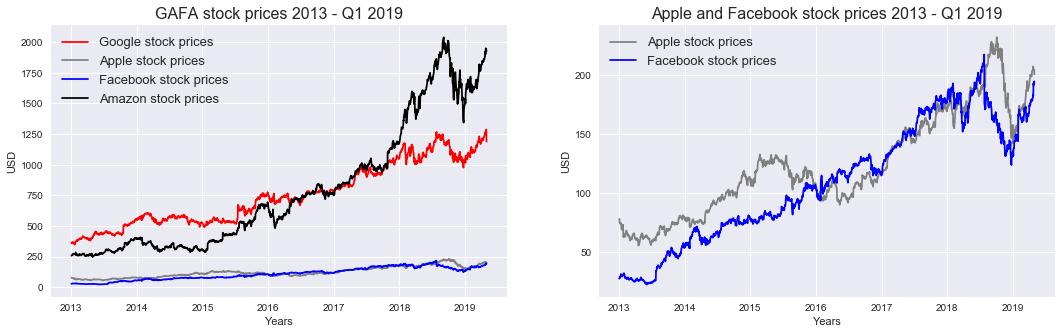

In [4]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.plot(df_G['Close Google'], 'r-', label='Google stock prices')
plt.plot(df_AP['Close Apple'], color='grey',label='Apple stock prices')
plt.plot(df_FB['Close FB'], 'b-', label='Facebook stock prices')
plt.plot(df_AMZ['Close Amazon'], color='black', label='Amazon stock prices')
plt.xlabel('Years')
plt.ylabel('USD')
plt.title('GAFA stock prices 2013 - Q1 2019', fontsize=16)
plt.legend(fontsize=13)



plt.subplot(1,2,2)
plt.plot(df_AP['Close Apple'], color='grey',label='Apple stock prices')
plt.plot(df_FB['Close FB'], 'b-', label='Facebook stock prices')
plt.title('Apple and Facebook stock prices 2013 - Q1 2019', fontsize=16)
plt.ylabel('USD')
plt.xlabel('Years')
plt.legend(fontsize=13)
plt.show()


While all companies performances plotted on one plot (on the left-hand side) we can see that :
1. There is significant difference in absolute values between Amazon&Google from one side and Apple&Facebook from another.<p>
    
2. For Amazon&Google we can see visible growth trend.<p>
    
3. Amazon is priced less than Google from 2013 till mi-2016, then it was at the same level during mi-2016 - Q4 2017. It performed extremely well during the period of Q4 2017 and especially in 2018, overpassed Google significantly. And despite of declining in the end of 2018 (Google was also declining at the same period) its stock prices are the highest of GAFA at the moment.<p>
    
4. Apple&Facebook trend is not very visible on the left-hand side plot that is why they are plotted separately.<p>
    
5. On Apple&Facebook plot we can see visible growth trend as well with declining period for Apple in 2015-2016, and for both of them in second half of 2018.

<i>After first visualisation let's look deeper at the data to find another trends and insights </i>

#### 1.1.3. A deeper look at GAFA stock prices: Daily stock price difference

One possible way to look deeper at stock data is to use shifting (lagging) (i.e. substracting the previous value from current value). Let's do that for GAFA using 'shift' method and plot the results. It shows us the volatility, the peaks and period of increasing/declining.


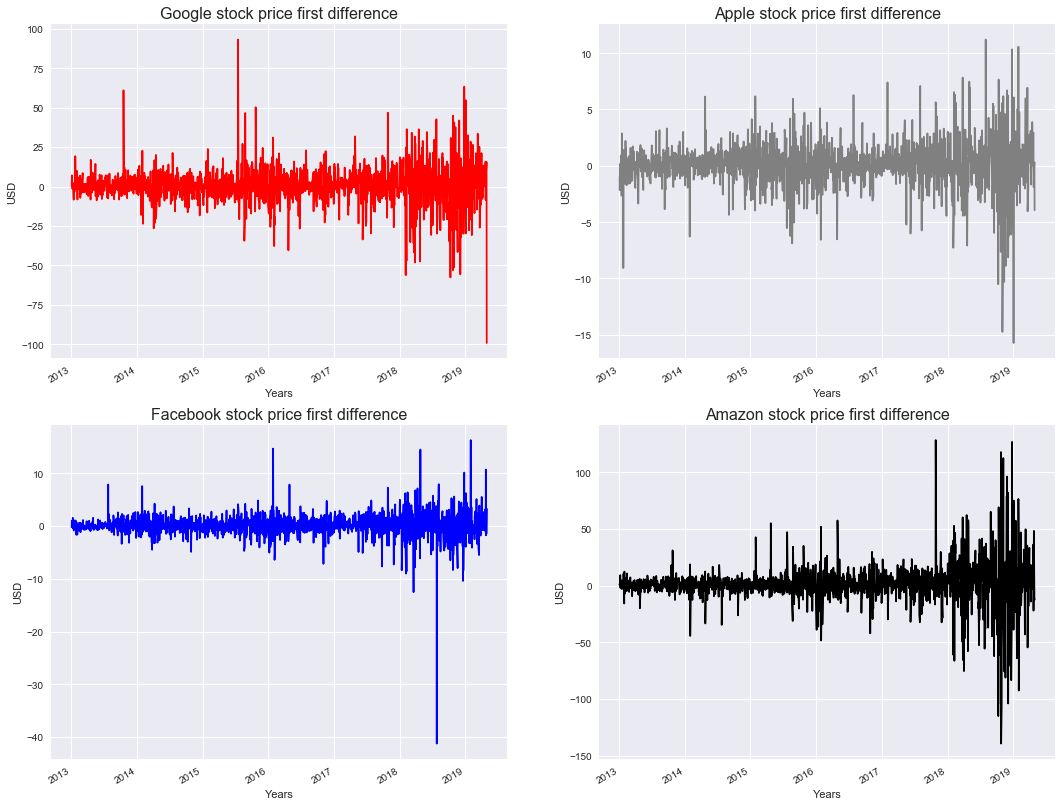

In [5]:
#Visualize GAFA daily stock price difference

plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
diff_G = df_G['Close Google'] - df_G['Close Google'].shift(1) #difference between current value and previous value
diff_G.plot(color = 'red')
plt.title('Google stock price first difference', fontsize=16)
plt.xlabel('Years')
plt.ylabel('USD')

plt.subplot(2,2,2)
diff_AP = df_AP['Close Apple'] - df_AP['Close Apple'].shift(1)
diff_AP.plot(color = 'grey')
plt.title('Apple stock price first difference', fontsize=16)
plt.xlabel('Years')
plt.ylabel('USD')

plt.subplot(2,2,3)
diff_FB = df_FB['Close FB'] - df_FB['Close FB'].shift(1)
diff_FB.plot( color = 'blue')
plt.title('Facebook stock price first difference', fontsize=16)
plt.xlabel('Years')
plt.ylabel('USD')

plt.subplot(2,2,4)
diff_AMZ = df_AMZ['Close Amazon'] - df_AMZ['Close Amazon'].shift(1)
diff_AMZ.plot( color = 'black')
plt.title('Amazon stock price first difference', fontsize=16)
plt.xlabel('Years')
plt.ylabel('USD')

plt.show()

At the plots above we can see that:

Points are centered around 0. Where variance increases a lot it can indicate that the data is exponentially increasing/decreasing<p>

We can see when prices changed significantly (peaks up or down). <br>
For Google: we can see some in 2013, 2015, 2017, 2019 (decrease)   <br>
For Apple:  every year quite many  <br>
For Facebook: in 2013, very begginning of 2014, in the beginning of 2016, another several ones in 2016 and so on. The biggest one  (decrease) is in 2018   <br>
For Amazon: visible peaks in 2014, 2015,2016. Significant one (positive) in the end of 2017   <br>
<p>

Also we can see periods of volatility.<br>
For Google: period of 2018   <br>
For Apple: 2015, end of 2018   <br>
For Facebook:  2018  <br>
For Amazon: 2018, 2019

It would be interesting to look deeply at positive and negative fluctuations during the period and to count total losses and gains. If summarize positive changes and negative changes, it gives us an idea of total amount of losses and total amount of gains.  In other words, if we invest, how much money would be 'lost', 'gain' and what is the profit.


In [6]:
#function

def trends(df):

    positive = []
    negative = []
    
    for i in df:
        if i>0:
            positive.append(i) 
        else: 
            negative.append(i)
    positive_trend = np.array(positive)
    negative_trend = np.array(negative[1:])
    print(np.sum(positive_trend), np.sum(negative_trend))
    

google_trends = trends(diff_G)
apple_trends = trends(diff_AP)
facebook_trends = trends(diff_FB)
amazon_trends = trends(diff_AMZ)


# create DataFrame with summarised fluctuations
# "Absolute stock price change" row shows absolute price increase per stock 

df_trends = pd.DataFrame({'Google':[6437.719953999998, -5608.528150999999], 'Apple':[1135.7357269999998, -1013.4985829999998],\
                        'Facebook':[1181.6600600000004, -1016.2600660000002], 'Amazon':[8895.879179, -7226.669156999999]}, \
                         index=['Positive', 'Negative'])

df_trends.loc['Absolute stock price change']= df_trends.sum()
df_trends


6437.719953999998 -5608.528150999999
1135.7357269999998 -1013.4985829999998
1181.6600600000004 -1016.2600660000002
8895.879179 -7226.669156999999


,Amazon,Apple,Facebook,Google
Positive,8895.879179,1135.735727,1181.660060,6437.719954
Negative,-7226.669157,-1013.498583,-1016.260066,-5608.528151
Absolute stock price change,1669.210022,122.237144,165.399994,829.191803


To inderstand better this result it is reasonable to plot it

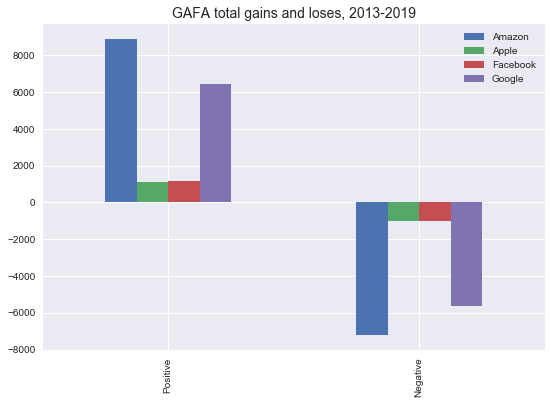

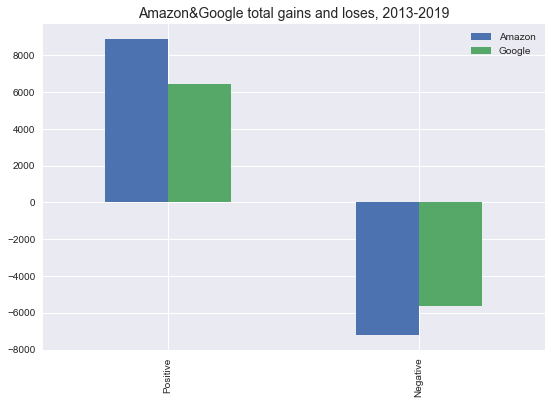

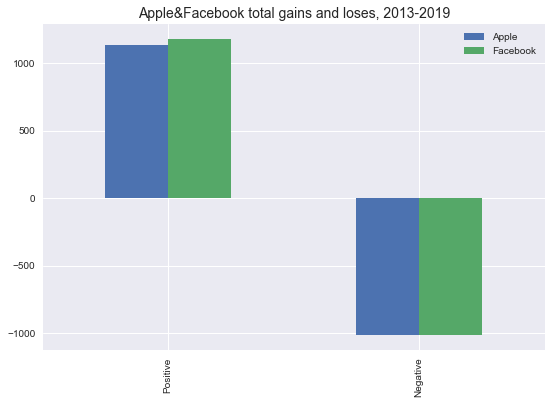

In [7]:
df_trends.loc[['Positive','Negative']].plot.bar(figsize=(9,6)).\
                                       set_title('GAFA total gains and loses, 2013-2019', fontsize=14);

df_trends.loc[['Positive','Negative'], ['Amazon', 'Google']].plot.bar(figsize=(9,6)).\
                                       set_title('Amazon&Google total gains and loses, 2013-2019', fontsize=14);

df_trends.loc[['Positive','Negative'], ['Apple', 'Facebook']].plot.bar(figsize=(9,6)).\
                                       set_title('Apple&Facebook total gains and loses, 2013-2019', fontsize=14);


Based on the plots above it can be concluded that:
- Total volume of gains/losses is very different between Amazon&Google from one side and Apple&Facebook on the other.
- To visualize better Apple&Facebook data they are plotted separately.
- It is visible that Amazon's stock price has grown more than Google's and
- Facebook's has grown more than Apple's

Let's visualize absolute stock prices changes

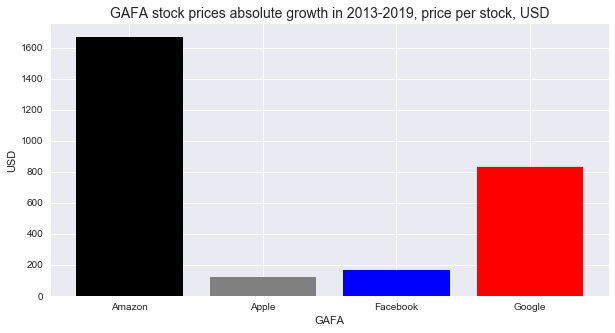

In [8]:
x_cor= np.arange(4)
GAFA = ['Amazon','Apple','Facebook','Google']
plt.figure(figsize=(10,5))
plt.bar(x_cor, df_trends.loc['Absolute stock price change'], color = ['black', 'grey', 'blue', 'red'] ) 
plt.xticks(x_cor, GAFA)
plt.ylabel('USD')
plt.xlabel('GAFA')
plt.title('GAFA stock prices absolute growth in 2013-2019, price per stock, USD', fontsize=14)
plt.show()

Amazon is the absolute leader, its stocks are 1 669 USD more expensive now comparing to 01-01-2013. For Google the difference is 829 USD. For Facebook: 165 USD and for Apple 122 USD. 

#### 1.1.4. Data decomposition
Let's look if there are seasonal or other trends in stock prices data.
As we've seen there is visible positive trend for all four companies. Let's decompose it to find out what trends could be there.

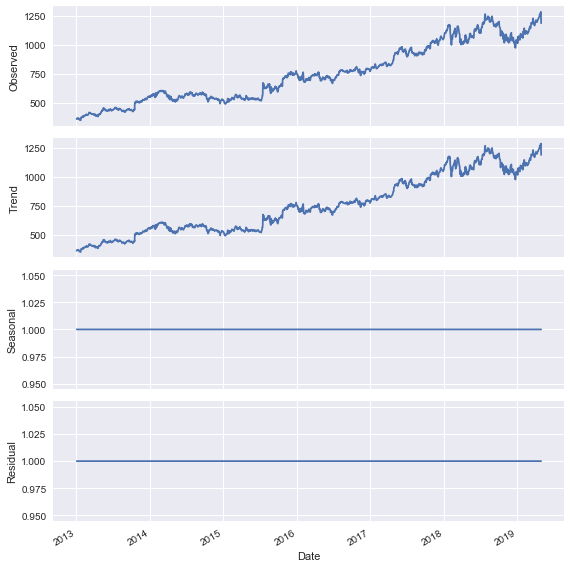

In [9]:
#Data Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8


#Let's start with Google
series = df_G['Close Google']
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()



###  <span style="color:red">Question</span>: <b>how to put title in this plot and in the plots below?<b>


From the plot above on Google stock prices, it can be concluded that there is no seasonal component in data, we can see only trend presented.<p>
What for others companies?

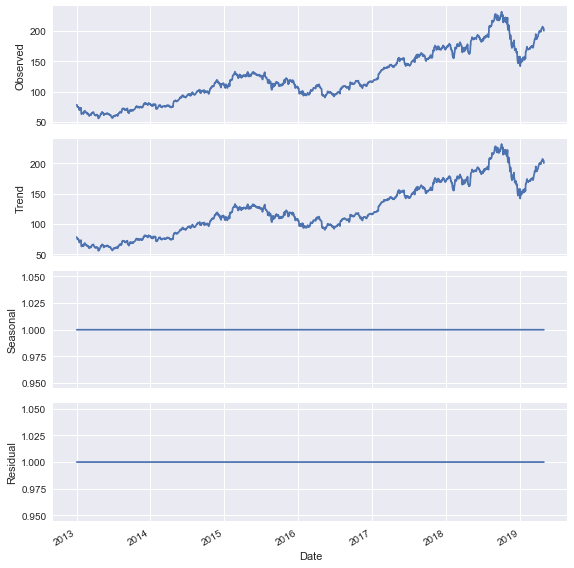

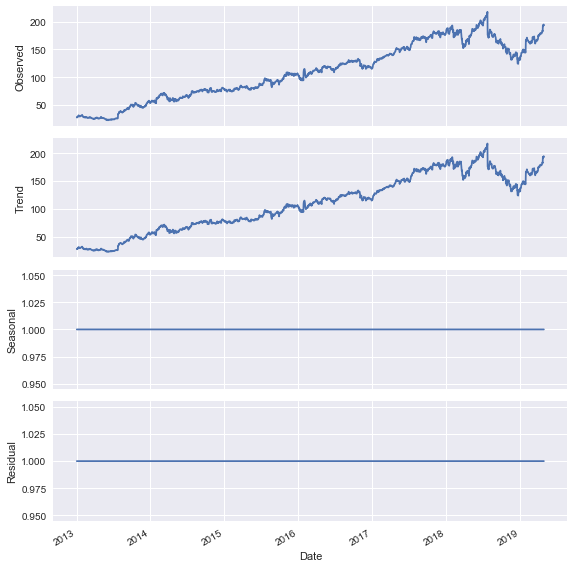

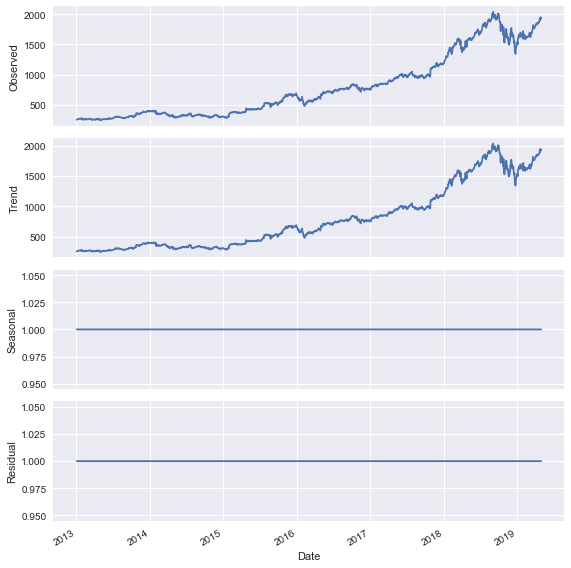

In [10]:
#Apple Data decomposition
series = df_AP['Close Apple']
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

#Facebook Data decomposition
series = df_FB['Close FB']
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

#Amazon Data decomposition
series = df_AMZ['Close Amazon']
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
plt.show()

For all other companies as demostrated above pattern in the same: there is no seasonal component, however trend is clearly visualised.<p>
After first exploratory analysis the following conclusions can be done:
- Threre is clear trend for growth for all four companies. 
- There is a lot of volatility in the data 
- Some periods of volatility are the same for all companies
- Despite of a lot of period of losses all companies's stocks have been in positive trend, the biggest absolute growth is for Amazon's stocks.
- There is no seasonal trend in GAFA's stocks, the volatilty is due to many other reasons but not to a seasonal component.
   


<i>Let's continue further analysis with widening stock market view and looking at main stock market Indexes, their performance during the same period</i><p>



### 1.2. Stock market Indexes  2013 - 2019 (January - April) analysis

To get a wider vision on stock market it seems to be reasonable to look at stock market indexes performance which reflect general stock market situation and trends. Next steps will be aimed to:
- look at stock market indexes performance during the same period,
- analise its trends 
- compare its performance with GAFA's one

As indexes for analysis  three main indexes were choosen: S&P 500, Dow Jones and NASDAQ*<br>

<i><font, size=2> *S&P 500 - The S&P 500 stock market index comprises stocks issued by 500 large-cap companies and traded on American stock exchanges (including the 30 companies that comprise the Dow Jones Industrial Average), and covers about 80% of the American equity market by capitalization. The index has traditionally been capitalization-weighted; that is, movements in the prices of stocks with higher market capitalizations (the share price times the number of shares outstanding) had a greater impact on the value of the index than do companies with smaller market caps. The companies in the S&P 500 are selected so they are representative of the industries in the United States economy. It is one of the most commonly followed equity indices, and many consider it one of the best representations of the U.S. stock market.
(Source: Wikipedia, https://en.wikipedia.org/wiki/S%26P_500_Index)
    
*Dow Jones - The Dow Jones Industrial Average (DJIA) is a stock market index that indicates the value of 30 large, publicly owned companies based in the United States, and how they have traded in the stock market during various periods of time.[4] These 30 companies are also included in the S&P 500 Index. The value of the Dow is not a weighted arithmetic mean[5] and does not represent its component companies' market capitalization, but rather the sum of the price of one share of stock for each component company. The sum is corrected by a factor which changes whenever one of the component stocks has a stock split or stock dividend, so as to generate a consistent value for the index.
(Source: Wikipedia, https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average)

*NASDAQ - The NASDAQ Composite is a stock market index of the common stocks and similar securities (e.g. ADRs, tracking stocks, limited partnership interests) listed on the NASDAQ stock market. Along with the Dow Jones Average and S&P 500 it is one of the three most-followed indices in US stock markets. The composition of the NASDAQ Composite is heavily weighted towards information technology companies.
(Source: Wikipedia,https://en.wikipedia.org/wiki/NASDAQ_Composite) </i></font>


#### 1.2.1.  Indexes data download

- Data source: YahooFinance, same source as for GAFA stock prices, data are provided in csv format.
- Period choosen: 6 last years from 2013 till 2018 (full years) plus the beginning of 2019 (January-April) is added to make the analysis as more up to date as possible.
- Data are downloaded separately for each index: S&P 500, DowJones, NASDAQ.
- From all data provided by Yahoo Finance three most relevant features are kept: Date, Volume, Close ( i. e. close price).
- Column 'Data' is set as dataframe index and converted into datetime type.
- Features are renamed to facilitate further data manipulating.
- Downloaded data into Pandas dataframe are checked with head/tail method.



In [11]:
# S&P 500 index

df_SP = pd.read_csv('GSPC_daily_2013-2019.csv')
df_SP.head()
df_SP = df_SP[['Date', 'Close', 'Volume']].set_index('Date')
df_SP.rename(columns={'Close':'Close S&P 500', 'Volume':'Volume S&P500'}, inplace=True)
df_SP.index = pd.to_datetime(df_SP.index)
print(df_SP.head())
print(df_SP.tail())


# Dow Jones Index

df_DJ = pd.read_csv('DJI_2013_2019.csv')
df_DJ = df_DJ[['Date', 'Close', 'Volume']].set_index('Date')
df_DJ.rename(columns={'Close':'Close DJ', 'Volume':'Volume DJ'}, inplace=True)
df_DJ.index = pd.to_datetime(df_DJ.index)
print(df_DJ.head())
print(df_DJ.tail())


#Nasdaq index

df_ND = pd.read_csv('IXIC_daily_2013-2019.csv')
df_ND = df_ND[['Date', 'Close', 'Volume']].set_index('Date')
df_ND.rename(columns={'Close':'Close ND', 'Volume':'Volume ND'}, inplace=True)
df_ND.index = pd.to_datetime(df_ND.index)
print(df_ND.head())
print(df_ND.tail())


            Close S&P 500  Volume S&P500
Date                                    
2013-01-02    1462.420044     4202600000
2013-01-03    1459.369995     3829730000
2013-01-04    1466.469971     3424290000
2013-01-07    1461.890015     3304970000
2013-01-08    1457.150024     3601600000
            Close S&P 500  Volume S&P500
Date                                    
2019-04-24    2927.250000     3448960000
2019-04-25    2926.169922     3425280000
2019-04-26    2939.879883     3248500000
2019-04-29    2943.030029     3118780000
2019-04-30    2945.830078     3919330000
                Close DJ  Volume DJ
Date                               
2013-01-02  13412.549805  161430000
2013-01-03  13391.360352  129630000
2013-01-04  13435.209961  107590000
2013-01-07  13384.290039  113120000
2013-01-08  13328.849609  129570000
                Close DJ  Volume DJ
Date                               
2019-04-24  26597.050781  283370000
2019-04-25  26462.080078  296730000
2019-04-26  26543.330078  3172

<i>Data are downloaded correctly, let's continue with its exploratory analysis</i>

#### 1.2.2. Indexes  exploratory analysis

Let's visualise indexes data and plot its performance

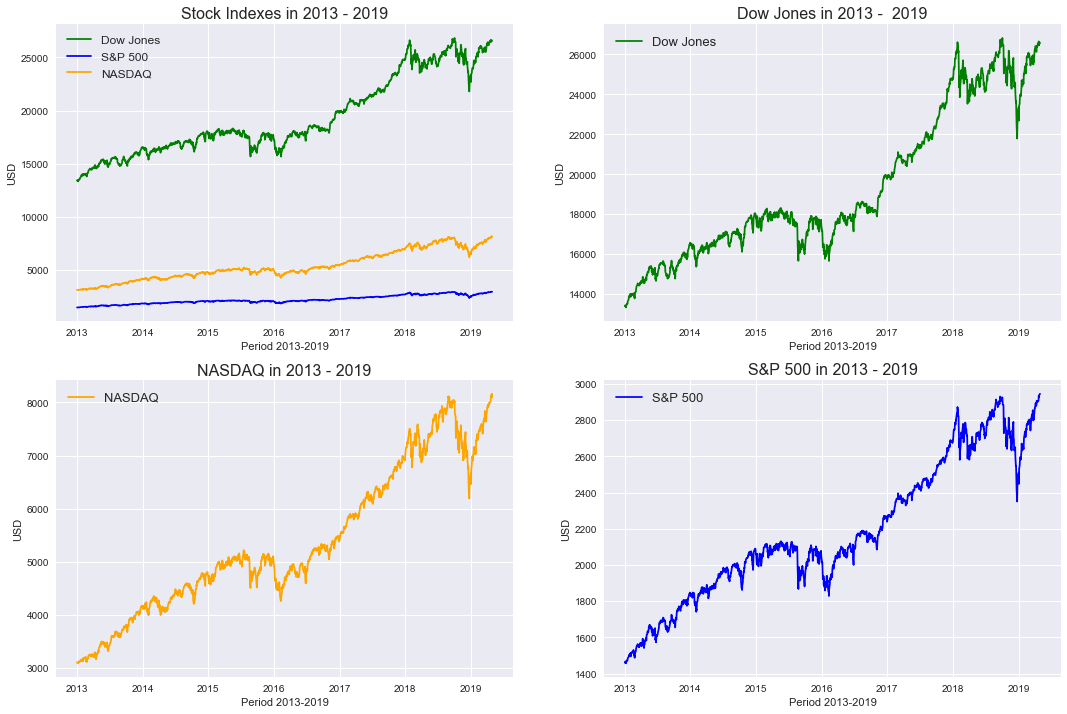

In [12]:
#Stock prices visualisation 

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.plot(df_DJ['Close DJ'], color = 'green', label = 'Dow Jones')
plt.plot(df_SP['Close S&P 500'], label = 'S&P 500', color = 'blue')
plt.plot(df_ND['Close ND'], color = 'orange', label = 'NASDAQ') 
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.title('Stock Indexes in 2013 - 2019', fontsize=16)
plt.legend(fontsize=12)

plt.subplot(2,2,2)
plt.plot(df_DJ['Close DJ'], color = 'green', label = 'Dow Jones') 
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.legend(fontsize=13)
plt.title('Dow Jones in 2013 -  2019', fontsize=16)

plt.subplot(2,2,3)
plt.plot(df_ND['Close ND'], color = 'orange', label = 'NASDAQ')  
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.legend(fontsize=13)
plt.title('NASDAQ in 2013 - 2019', fontsize=16)

plt.subplot(2,2,4)
plt.plot(df_SP['Close S&P 500'], label = 'S&P 500', color = 'blue')
plt.xlabel('Period 2013-2019')
plt.ylabel('USD')
plt.title('S&P 500 in 2013 - 2019', fontsize=16)
plt.legend(fontsize=13)
plt.show()


1. At the first plot (up, left-hand side) we can see all three indexes data, its absolute values vary significantly. Hence, to visualise better each one of them, they are plotted separtely.<p>

2. While absolute value of indexes is different, we can see that pattern is seemed to be very similar.<p>

3. General data trend is growing, with some periods of decline.




#### 1.2.3. A deeper look at Indexes stock prices: Daily stock price difference

As it was done for GAFA stock prices,  indexes stock prices can be analysed in the same way, using shifting (lagging) with 'shift' method and  the results plotted.

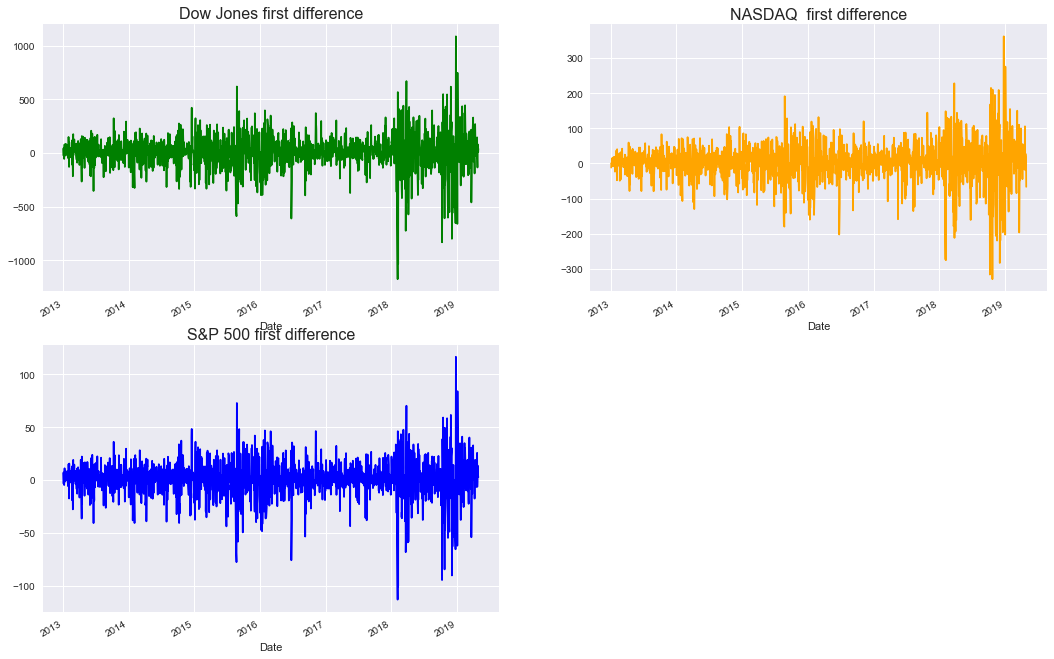

In [13]:
#Visualize Indexes daily stock price difference

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
diff_DJ = df_DJ['Close DJ'] - df_DJ['Close DJ'].shift(1) #difference between currant value and previous value
diff_DJ.plot(color = 'green')
plt.title('Dow Jones first difference', fontsize=16)

plt.subplot(2,2,2)
diff_ND = df_ND['Close ND'] - df_ND['Close ND'].shift(1)
diff_ND.plot(color = 'orange')
plt.title('NASDAQ  first difference', fontsize=16)

plt.subplot(2,2,3)
diff_SP = df_SP['Close S&P 500'] - df_SP['Close S&P 500'].shift(1)
diff_SP.plot(color = 'blue' )
plt.title('S&P 500 first difference', fontsize=16)


plt.show()

1. Here again we can see that idexes have quite similar behavoir
2. Peaks moment are pretty much the same for all three of indexes as well as periods of volatility.


We can see that index data while differ in absolute values are characterised by pretty similar patterns, while GAFA data paterns vary between them. The common point is that all stock prices we've seen have veryclear growth trend despite some preiodes of decline.

Now it would be interesting to look at absolute growth, as it has been seen for GAFA, i.e. difference between stock prices on 01.01.2013 and 30.04.2019. 


DowJones: 13412.549805 26592.910156
NASDAQ: 3112.26001 8095.390137
S&P 500: 1462.420044 2945.830078
Dow Jones absolute growth: 13180.360351000001
NASDAQ absolute growth: 4983.130127
S&P 500 absolute growth: 1483.410034


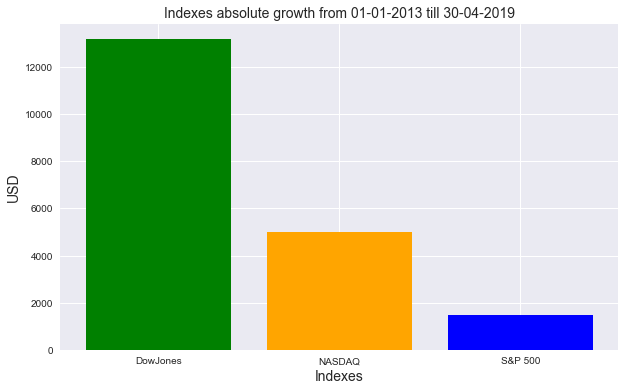

In [14]:
# Values on 01.01.2013 and 30.04.2019

print('DowJones:', df_DJ['Close DJ'][0], df_DJ['Close DJ'][-1])
print('NASDAQ:', df_ND['Close ND'][0], df_ND['Close ND'][-1])
print('S&P 500:', df_SP['Close S&P 500'][0], df_SP['Close S&P 500'][-1])


# Difference (absolute price growth)

DowJones = df_DJ['Close DJ'][-1] - df_DJ['Close DJ'][0]
print('Dow Jones absolute growth:', DowJones)

NASDAQ = df_ND['Close ND'][-1] - df_ND['Close ND'][0]
print('NASDAQ absolute growth:', NASDAQ)

S_P_500 = df_SP['Close S&P 500'][-1] - df_SP['Close S&P 500'][0]
print('S&P 500 absolute growth:', S_P_500)

plt.figure(figsize=(10,6))
plt.bar(np.arange(3), [DowJones, NASDAQ, S_P_500], color=['green', 'orange', 'blue'])
plt.title('Indexes absolute growth from 01-01-2013 till 30-04-2019', fontsize=14)
plt.xticks(np.arange(3), ['DowJones', 'NASDAQ', 'S&P 500'])
plt.ylabel('USD', fontsize=14)
plt.xlabel('Indexes', fontsize=14)
plt.show()

As visualised on the plot, Dow Jones Index has maximum absolute growth at about 13 000 USD/stock, NASDAQ - at about 5 000 USD, and S&P 500 - at about 1500 USD. But what about ROI (return on investment)? what stocks are more profitable form that point of view? it will be analysed further, in comparison with GAFA's ROI. 
<p>
Now let's see at GAFA and indexes stock prices together to know more if and how they are related to each other.

### 1.3 GAFA & Indexes Stock prices analysis 

To begin this analysis let's concatenate GAFA and Indexes DataFrames.

In [15]:
#Concatenate data frames in one

df = pd.concat([df_G, df_AP,  df_FB, df_AMZ, df_SP, df_DJ, df_ND], axis=1)
df.index = pd.to_datetime(df.index)
print(df.shape)
df.head()


(1592, 14)


,Close Google,Volume Google,Close Apple,Volume Apple,Close FB,Volume FB,Close Amazon,Volume Amazon,Close S&P 500,Volume S&P500,Close DJ,Volume DJ,Close ND,Volume ND
Date,,,,,,,,,,,,,,
2013-01-02,359.288177,5115500,78.432854,140129500,28.000000,69846400,257.309998,3271000,1462.420044,4202600000,13412.549805,161430000,3112.260010,2111300000
2013-01-03,359.496826,4666500,77.442856,88241300,27.770000,63140600,258.480011,2750900,1459.369995,3829730000,13391.360352,129630000,3100.570068,1769420000
2013-01-04,366.600616,5562800,75.285713,148583400,28.760000,72715400,259.149994,1874200,1466.469971,3424290000,13435.209961,107590000,3101.659912,1745140000
2013-01-07,365.001007,3332900,74.842857,121039100,29.420000,83781800,268.459991,4910000,1461.890015,3304970000,13384.290039,113120000,3098.810059,1702540000
2013-01-08,364.280701,3373900,75.044289,114676800,29.059999,45871300,266.380005,3010700,1457.150024,3601600000,13328.849609,129570000,3091.810059,1744380000


Now we've got pandas DataFrame with close prices and volume prices of GAFA and three stock indexes (S&P 500, DowJones and Nasdaq).

Let's see how they are correlated

#### 1.3.1. Stock prices correlation

To compute stock prices correlation only close data are kept. 

In [16]:
# Create data frame for close price data for GAFA and Indexes

df_close = pd.concat([df_G['Close Google'], df_AP['Close Apple'], df_FB['Close FB'], df_AMZ['Close Amazon'], df_SP['Close S&P 500'], df_DJ['Close DJ'], df_ND['Close ND']], axis=1)
df_close.head()

,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND
Date,,,,,,,
2013-01-02,359.288177,78.432854,28.000000,257.309998,1462.420044,13412.549805,3112.260010
2013-01-03,359.496826,77.442856,27.770000,258.480011,1459.369995,13391.360352,3100.570068
2013-01-04,366.600616,75.285713,28.760000,259.149994,1466.469971,13435.209961,3101.659912
2013-01-07,365.001007,74.842857,29.420000,268.459991,1461.890015,13384.290039,3098.810059
2013-01-08,364.280701,75.044289,29.059999,266.380005,1457.150024,13328.849609,3091.810059


,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND
Close Google,1.000000,0.918166,0.956163,0.964089,0.964661,0.962045,0.972723
Close Apple,0.918166,1.000000,0.896824,0.914750,0.968071,0.957396,0.973662
Close FB,0.956163,0.896824,1.000000,0.880220,0.947224,0.917001,0.946314
Close Amazon,0.964089,0.914750,0.880220,1.000000,0.935301,0.953788,0.954722
Close S&P 500,0.964661,0.968071,0.947224,0.935301,1.000000,0.987862,0.995658
Close DJ,0.962045,0.957396,0.917001,0.953788,0.987862,1.000000,0.987590
Close ND,0.972723,0.973662,0.946314,0.954722,0.995658,0.987590,1.000000


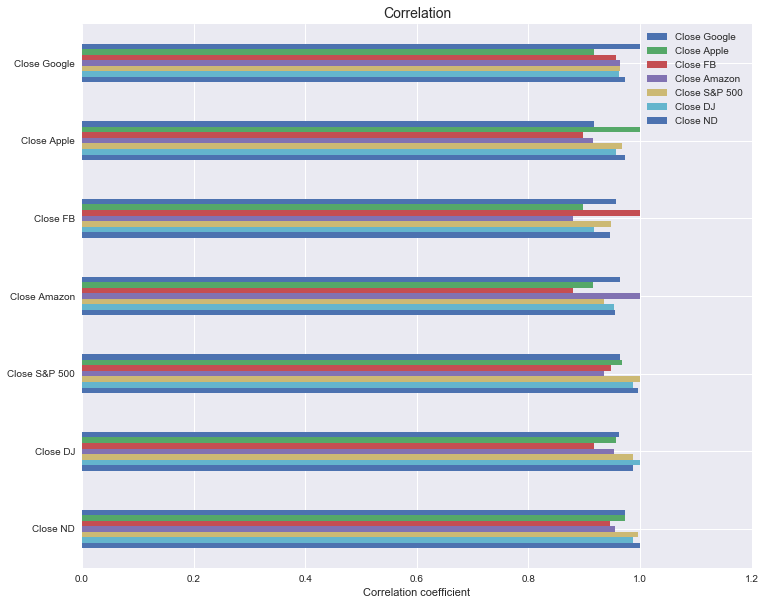

In [17]:
#Computing correlation

corr_plt = df_close.corr().plot.barh(figsize=(12,10))
corr_plt.set(xlim=(0,1.2))
corr_plt.set_title('Correlation', fontsize=14)
corr_plt.set_xlabel('Correlation coefficient')
corr_plt.invert_yaxis();
corr = df_close.corr()
corr

We can see that stock prices of GAFA and Indexes are strongly corellated. Correlation coefficient varies between 0.88 - 0.99 which could mean that periods of growth or decline are supposed to be similar.


For better understanding of correlation let's plot its data using heat map. It allows us to see better which stocks are correlated with the highest scores.

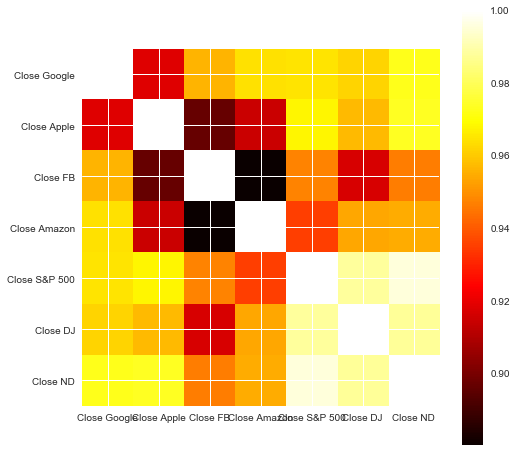

In [18]:
plt.imshow(corr, cmap='hot')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Based on the plot above we can see that hiehest correlations is for Indexes.
Also Nasdaq index is highly correlated with Google & Apple, and S&P500 with Apple.
The lowest correlation here is between Facebook&Amazon and Apple&Facebook. But still these coefficient are quite high: 0.88 and 0.89

To extend correlation analysis let's look as well at the  <b>correlation of percentage change<b>

In [19]:
pers_close = df_close.pct_change()
pers_close = pers_close[1:] #drop first row in data set with NA values
corr2 = pers_close.corr()
corr2

,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND
Close Google,1.000000,0.417540,0.487478,0.590885,0.644561,0.581064,0.720293
Close Apple,0.417540,1.000000,0.329104,0.363710,0.560911,0.523573,0.641761
Close FB,0.487478,0.329104,1.000000,0.465260,0.469424,0.396478,0.566409
Close Amazon,0.590885,0.363710,0.465260,1.000000,0.572756,0.509009,0.660934
Close S&P 500,0.644561,0.560911,0.469424,0.572756,1.000000,0.965409,0.943427
Close DJ,0.581064,0.523573,0.396478,0.509009,0.965409,1.000000,0.870468
Close ND,0.720293,0.641761,0.566409,0.660934,0.943427,0.870468,1.000000


Just at a first look we can see that correlation is not so high. Let's plot it with heat map

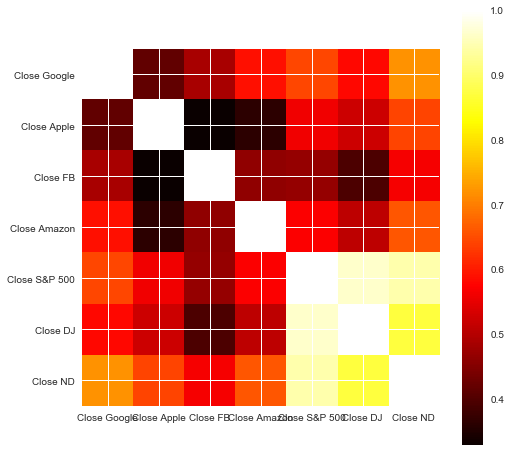

In [20]:
plt.imshow(corr2, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr2)), corr.columns)
plt.yticks(range(len(corr2)), corr.columns);

In fact, this plot is quite different from the previous one. Correlation coefficients are significantly lower. However, what we can see here that the pattern is pretty the same: Indexes are highly correlated as we saw on the previous plot, as well as NASDAQ with Google and Apple.


Let's visualize both correlations in pairplots.
Stock prices correlation:

C:\Users\User1\Anaconda3\envs\exts-aml2\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


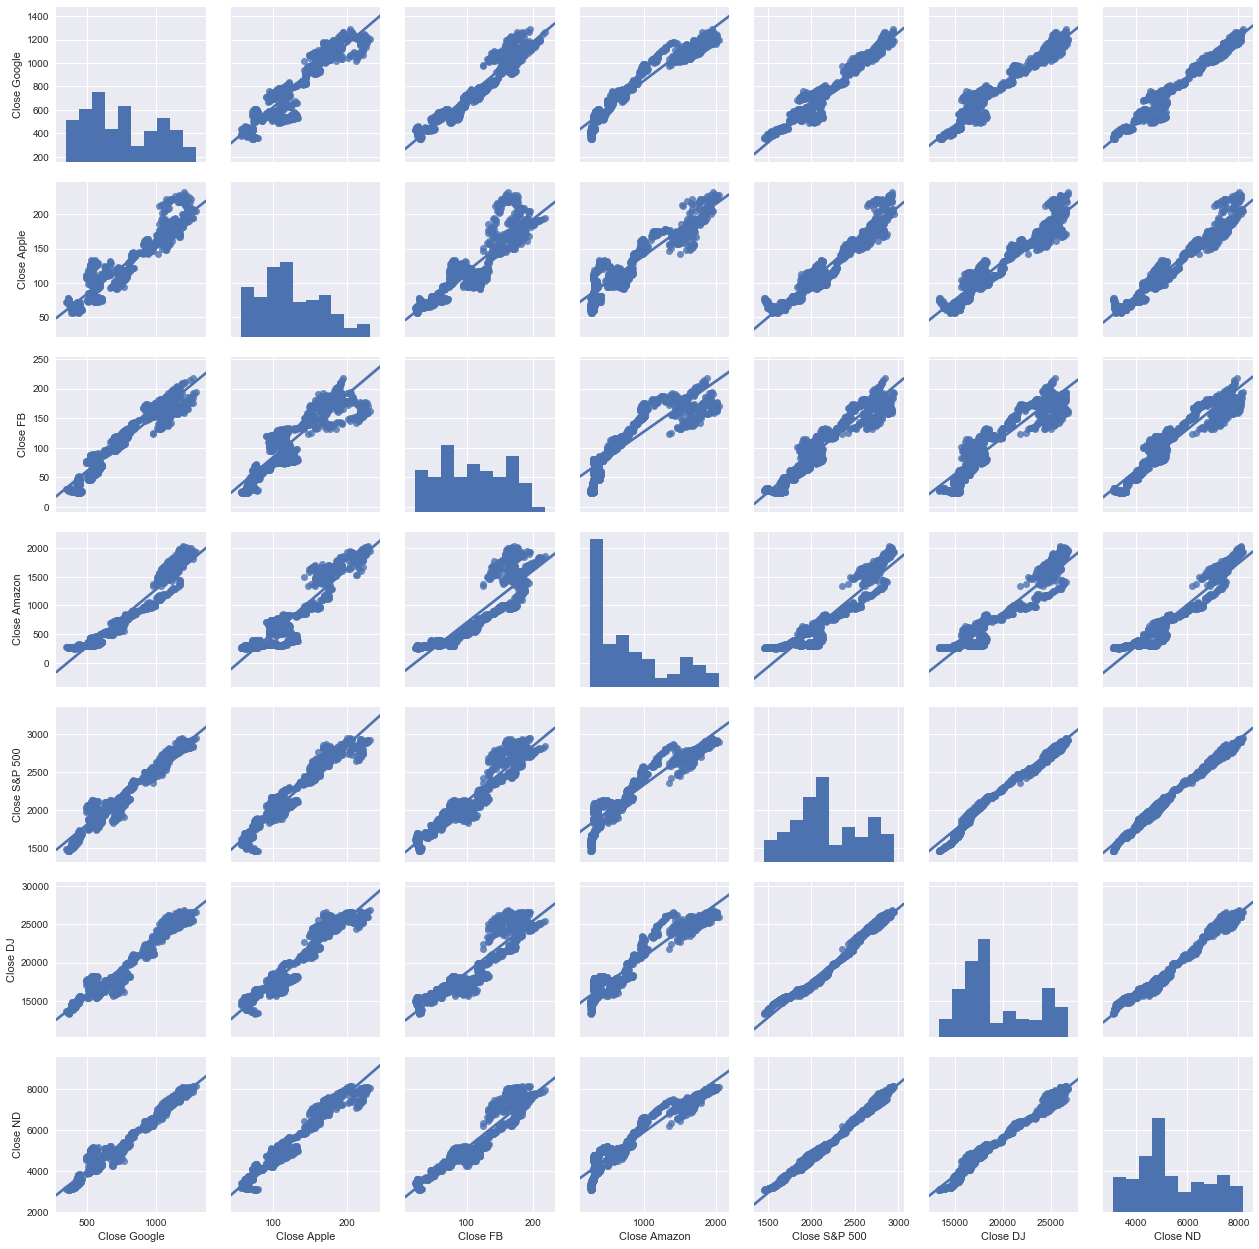

In [21]:
sns.pairplot(df_close, kind='reg');

Percentage change correlation

C:\Users\User1\Anaconda3\envs\exts-aml2\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


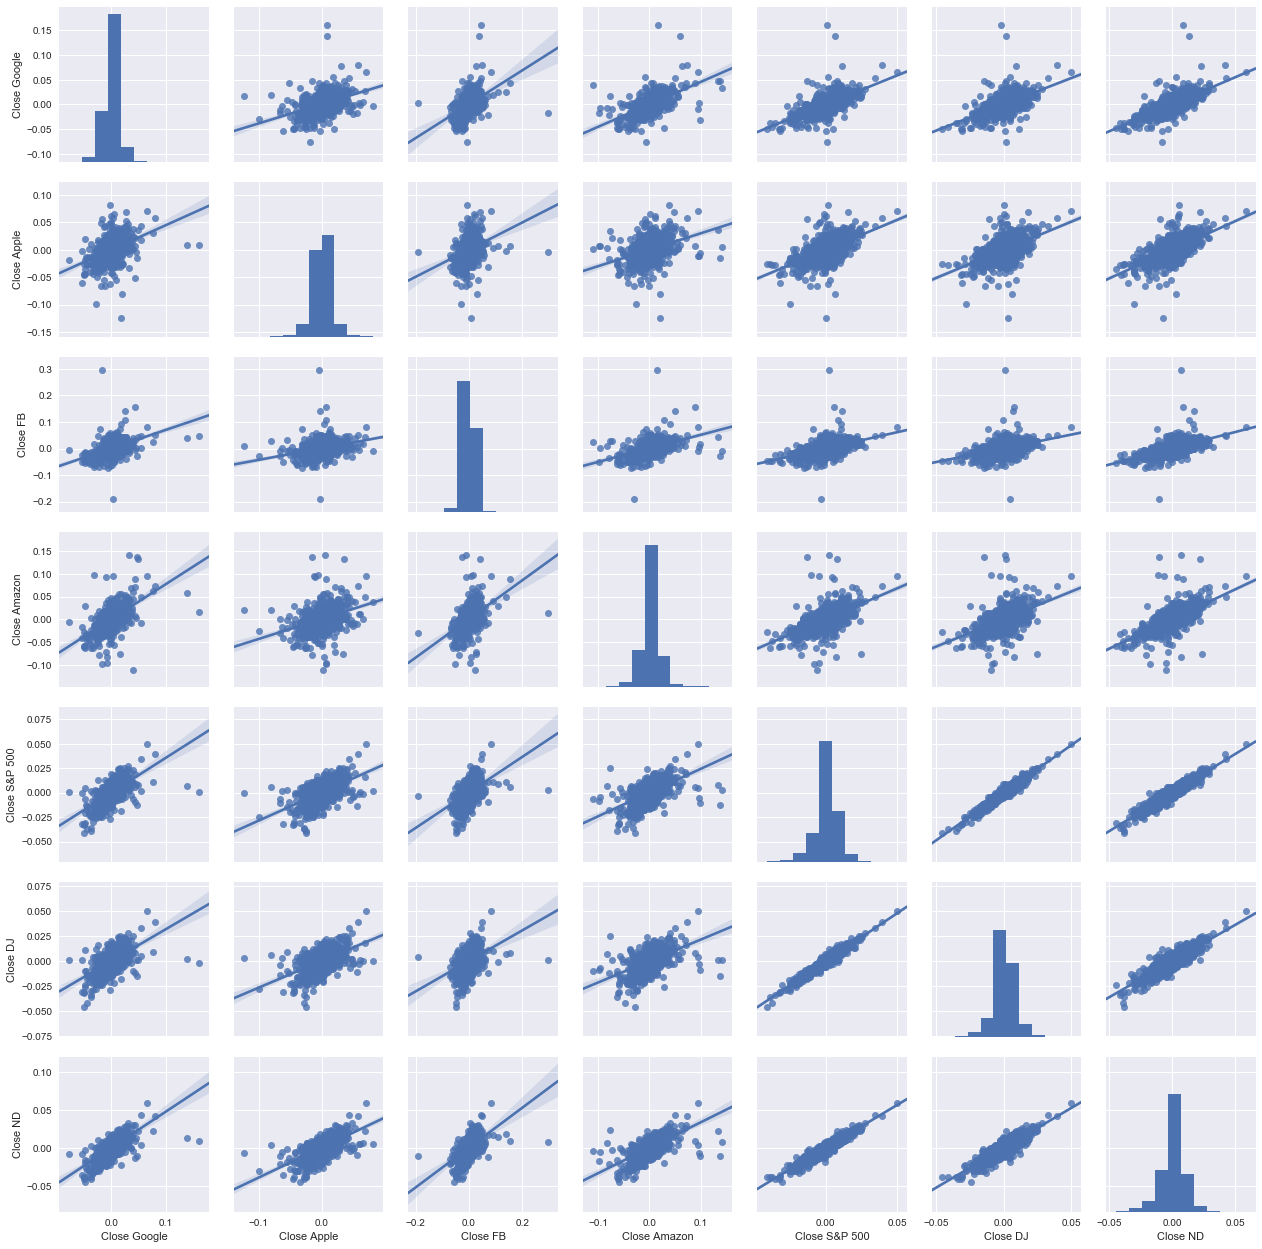

In [22]:
sns.pairplot(pers_close, kind='reg');

On this plot data are distrubuted differently, more concentrated than on the previous pairplot, which obviously affects correlation. But with the exception of indexes data, which keep very similar pattern as on previous plot and as we've seen above are still highly correlated.

To move forward our analysis let's look now at rolling data

#### 1.3.2 Rolling windows

To plan investments or just to analysis purposes it could be necessary to define favorable periods to invest. Usually periods of decline are favorable to buy and period of increase - to sell. To define more clear increasing/deacreasing trends, rolling method we can used.

Let's apply it to the original data as well as to logarithmically transformed data.

In [23]:
df_close.head().round(2)

,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND
Date,,,,,,,
2013-01-02,359.29,78.43,28.00,257.31,1462.42,13412.55,3112.26
2013-01-03,359.50,77.44,27.77,258.48,1459.37,13391.36,3100.57
2013-01-04,366.60,75.29,28.76,259.15,1466.47,13435.21,3101.66
2013-01-07,365.00,74.84,29.42,268.46,1461.89,13384.29,3098.81
2013-01-08,364.28,75.04,29.06,266.38,1457.15,13328.85,3091.81


In [24]:
# logarithmic transformation of close stock prices

df_close_log = df_close.apply(np.log).round(2)
df_close_log.head()

,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND
Date,,,,,,,
2013-01-02,5.88,4.36,3.33,5.55,7.29,9.50,8.04
2013-01-03,5.88,4.35,3.32,5.55,7.29,9.50,8.04
2013-01-04,5.90,4.32,3.36,5.56,7.29,9.51,8.04
2013-01-07,5.90,4.32,3.38,5.59,7.29,9.50,8.04
2013-01-08,5.90,4.32,3.37,5.58,7.28,9.50,8.04


Let's  try different rolling  windows and begin with weekly window. 

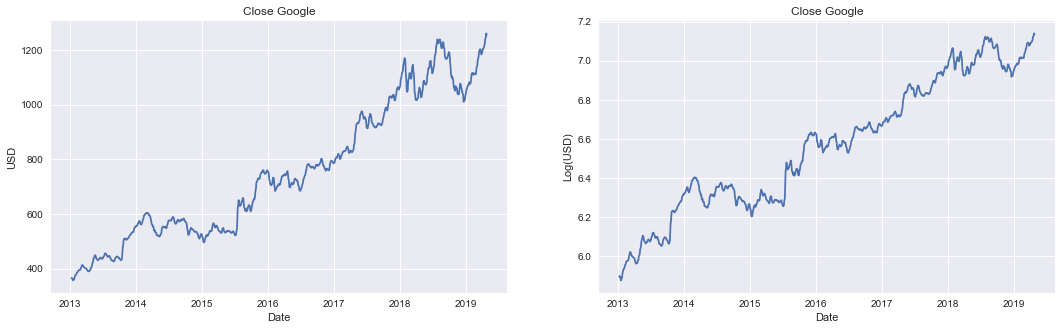

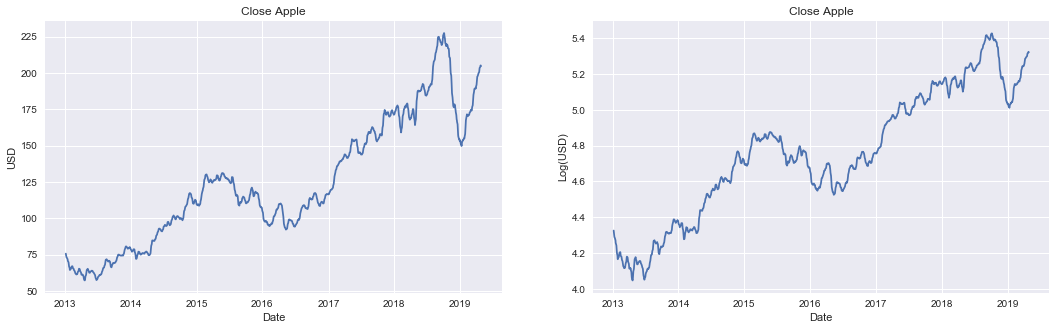

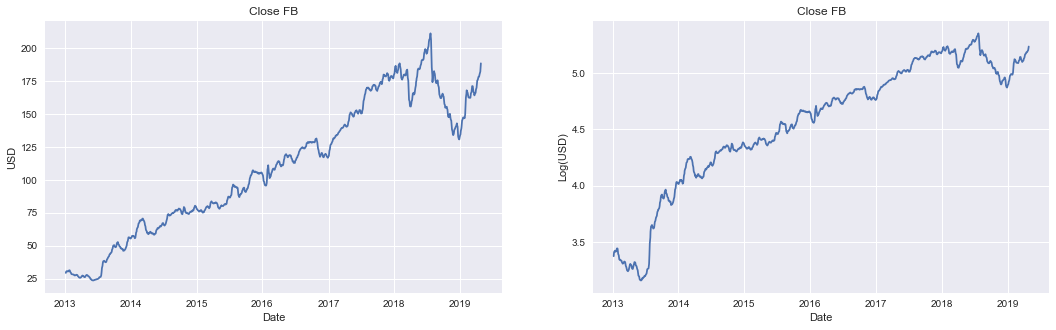

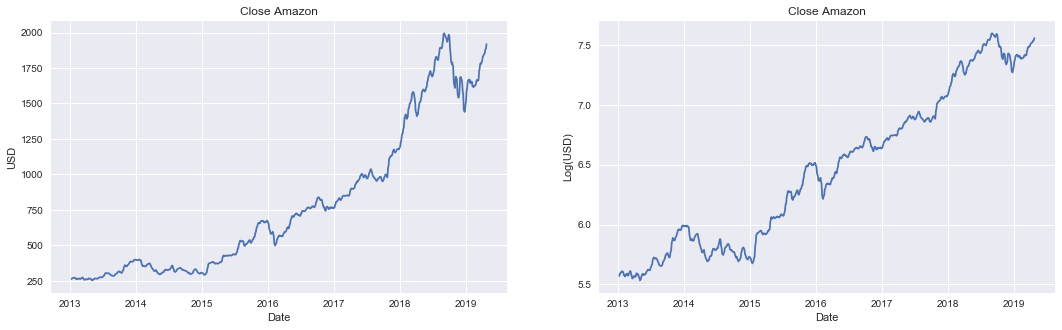

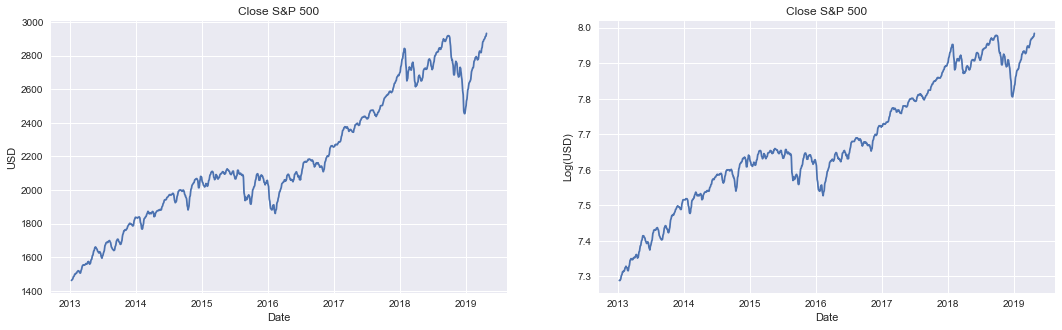

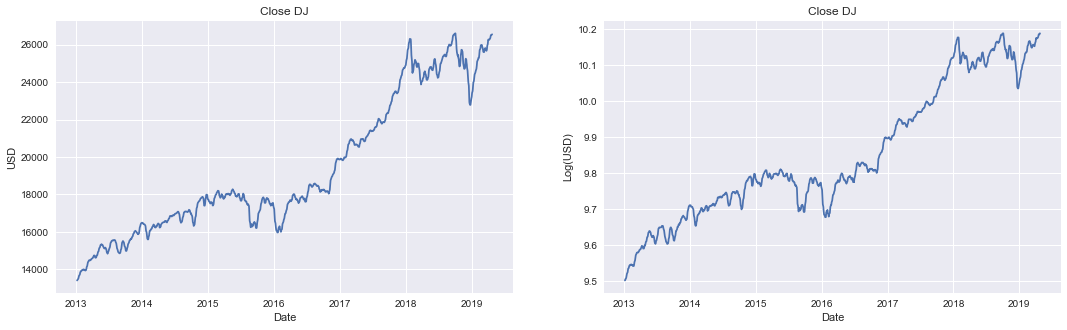

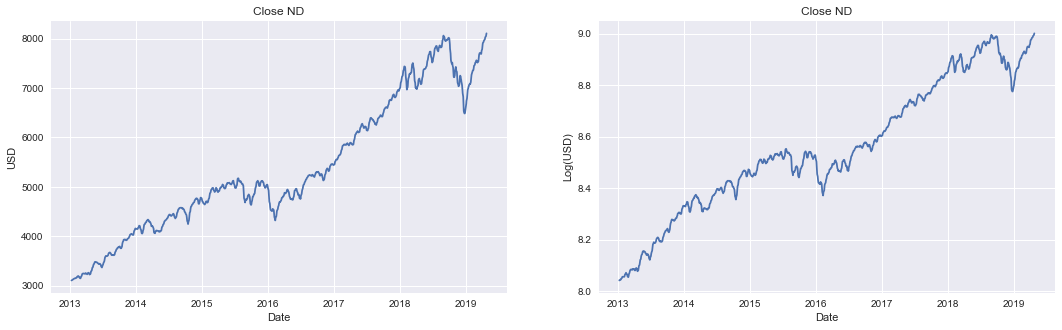

In [25]:
#Weekly rolling mean

rolling_weekly = df_close.rolling(7, center=True).mean()
rolling_weekly_log = df_close_log.rolling(7, center=True).mean()


for close in df_close:
    plt.figure(figsize=(18,5))
    
    plt.subplot(1,2,1)
    plt.plot(rolling_weekly[close])
    plt.title(close)
    plt.xlabel('Date')
    plt.ylabel('USD')
    
    plt.subplot(1,2,2)
    plt.plot(rolling_weekly_log[close])    
    plt.title(close)
    plt.xlabel('Date')
    plt.ylabel('Log(USD)')
    
    plt.show()
    



## <span style="color:red">Questions</span>
<b>How to correct titltes using a loop?<br>
How to display all plot without scroll it?<br>
How one can interpret  log transformed data?<b>

Weekly rolling data are smoother but there are still a lot of fluctuations and it is not very clear to define periods of increase/decline. To improve this, let's change rolling window to one month.


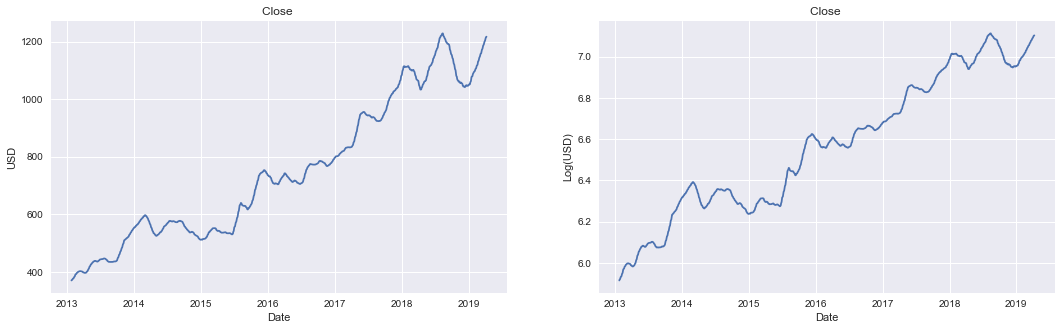

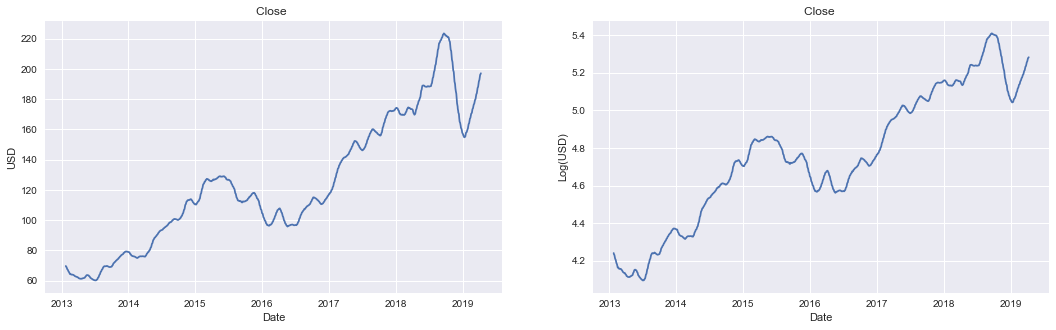

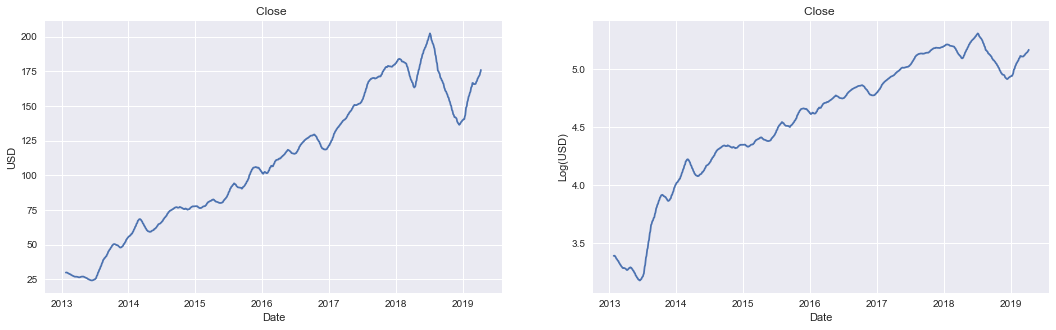

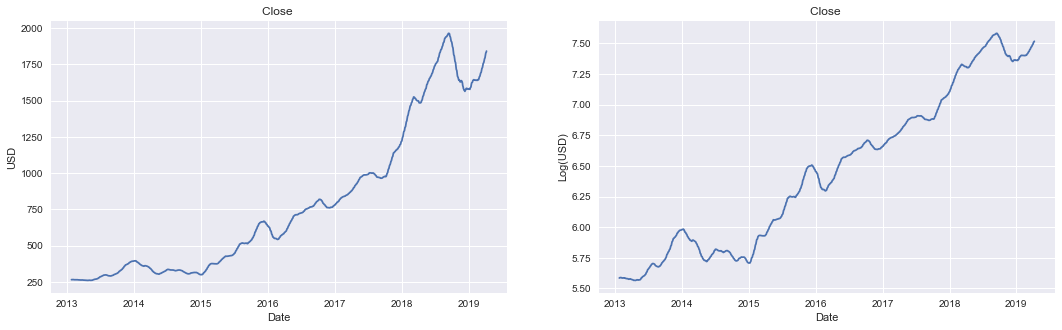

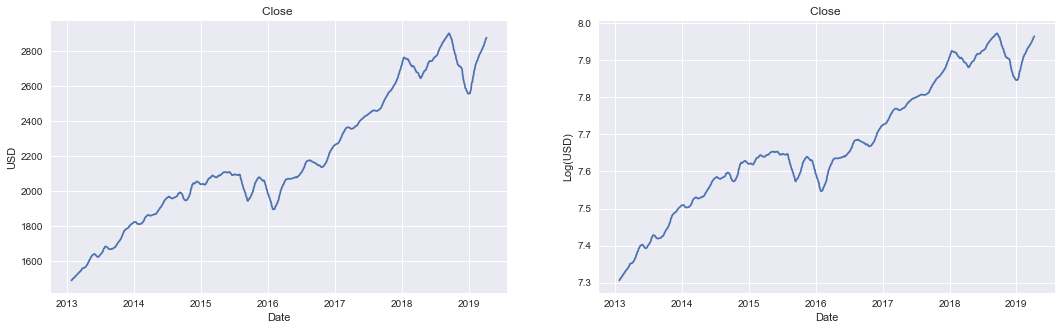

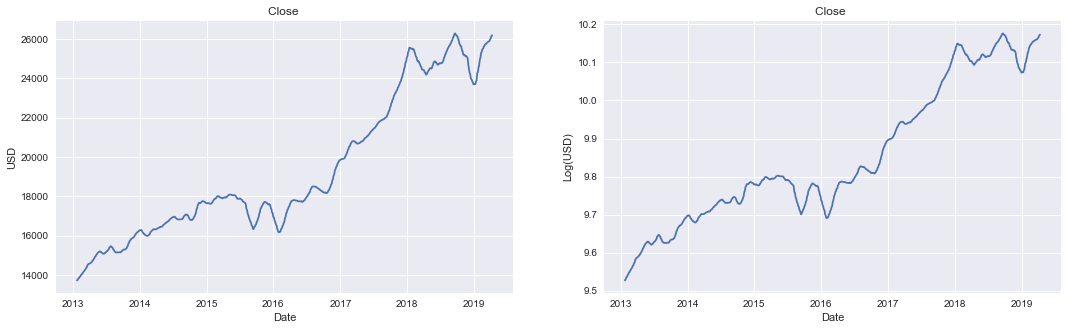

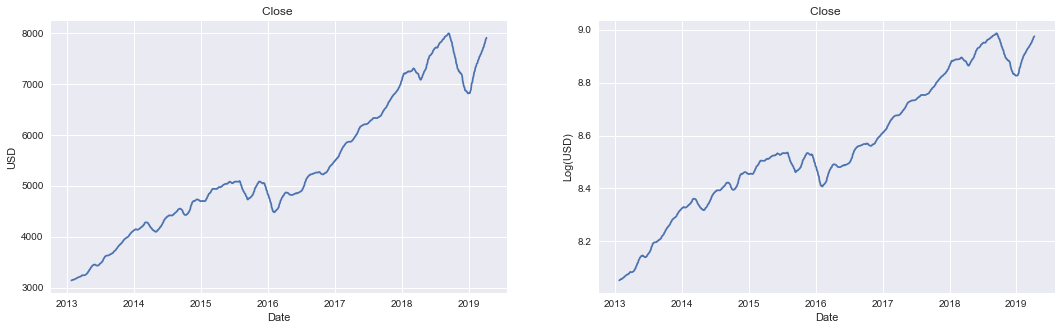

In [26]:
#Monthly rolling mean

rolling_monthly = df_close.rolling(30, center=True).mean()
rolling_monthly_log = df_close_log.rolling(30, center=True).mean()


for close in df_close:
    plt.figure(figsize=(18,5))
    
    plt.subplot(1,2,1)
    plt.plot(rolling_monthly[close])
    plt.title('Close ')
    plt.xlabel('Date')
    plt.ylabel('USD')
    
    plt.subplot(1,2,2)
    plt.plot(rolling_monthly_log[close]) 
    plt.title('Close ')
    plt.xlabel('Date')
    plt.ylabel('Log(USD)')
    
    plt.show()
    


With weekly rolling window we can see that data are smoother but still periods increase/decline are numerous.
Let's try three month rolling window

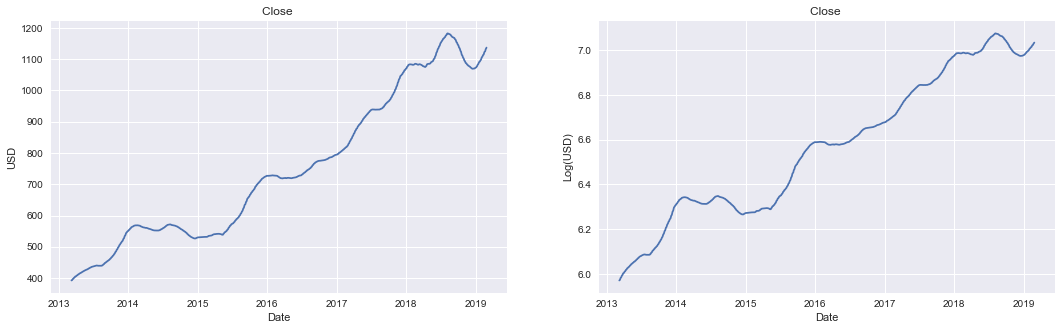

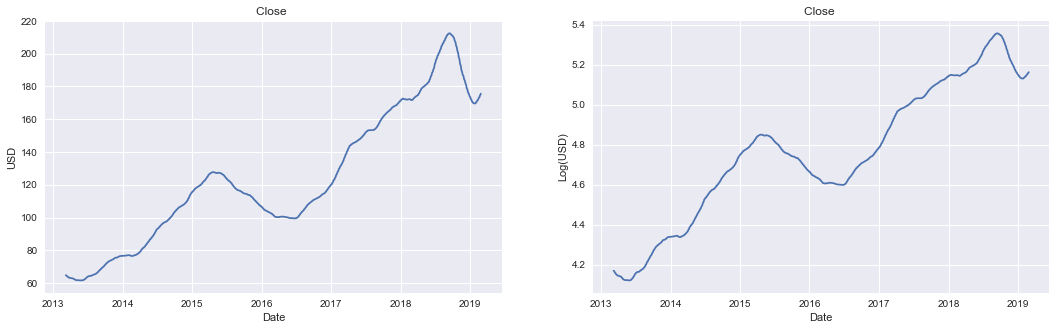

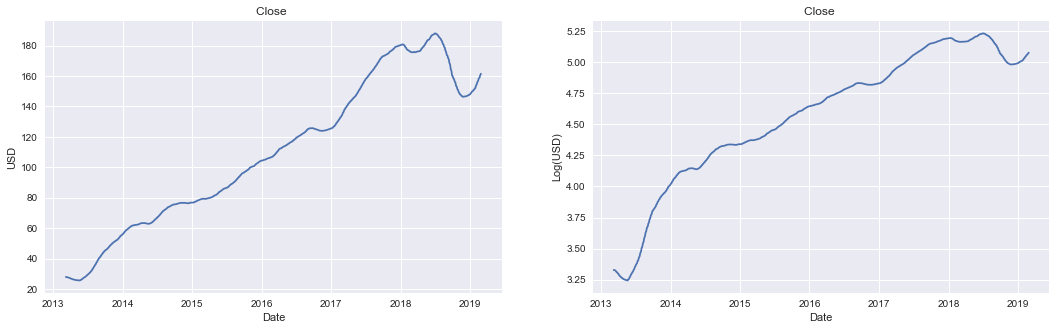

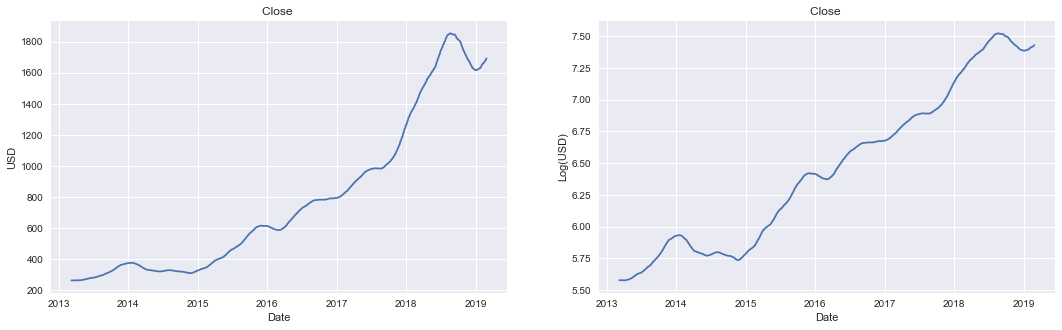

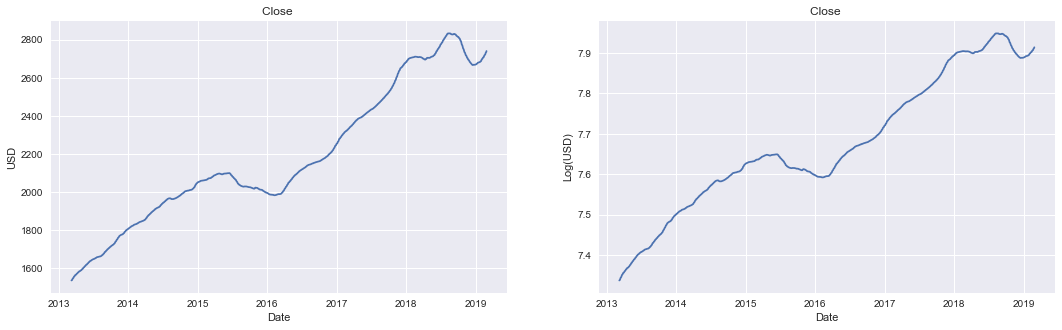

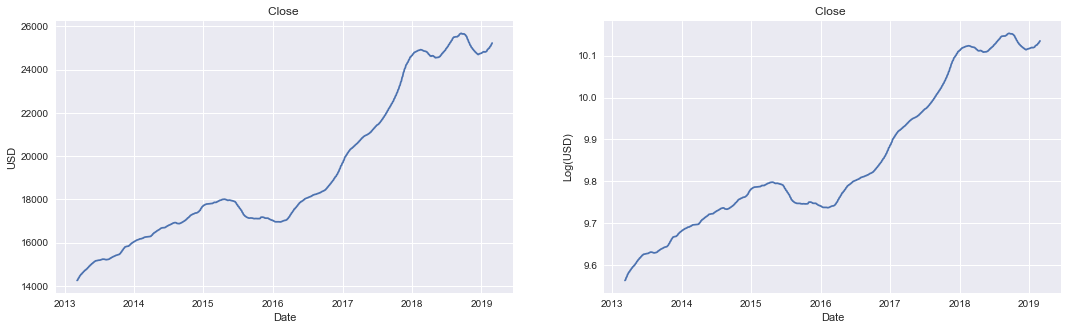

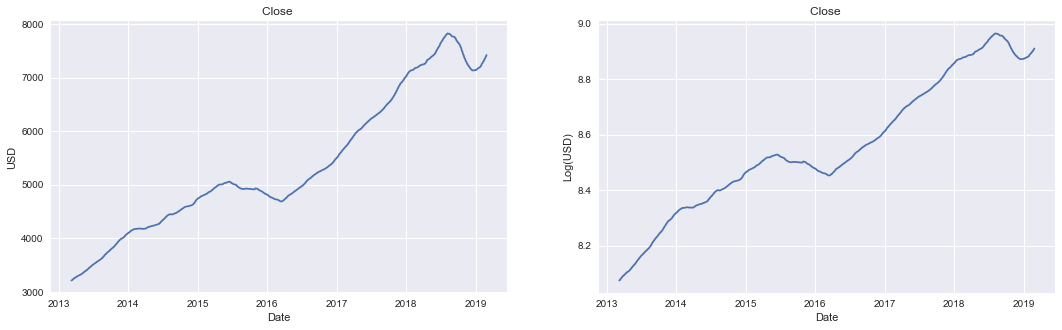

In [27]:
# Three months rolling mean

rolling_monthly = df_close.rolling(90, center=True).mean()
rolling_monthly_log = df_close_log.rolling(90, center=True).mean()


for close in df_close:
    plt.figure(figsize=(18,5))
    
    plt.subplot(1,2,1)
    plt.plot(rolling_monthly[close])
    plt.title('Close ')
    plt.xlabel('Date')
    plt.ylabel('USD')
    
    plt.subplot(1,2,2)
    plt.plot(rolling_monthly_log[close]) 
    plt.title('Close ')
    plt.xlabel('Date')
    plt.ylabel('Log(USD)')
    
    plt.show()
    
    

Here we can see trends which are much more visible, short periods of fluctuations are smoothed out and larger periods of increase/decline are visible and can be used for example planning investments purposes.

Now let's look at data variance.

#### 1.3.4 Variance 

comments

## <span style="color:red">Questions</span>
<b>How to interpret data on the plots (variance) ?<b>

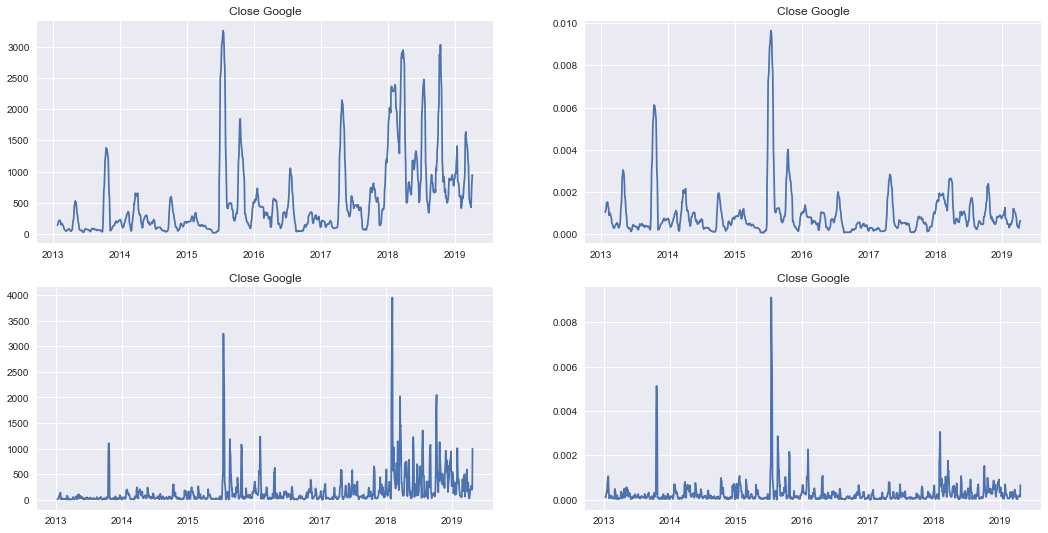

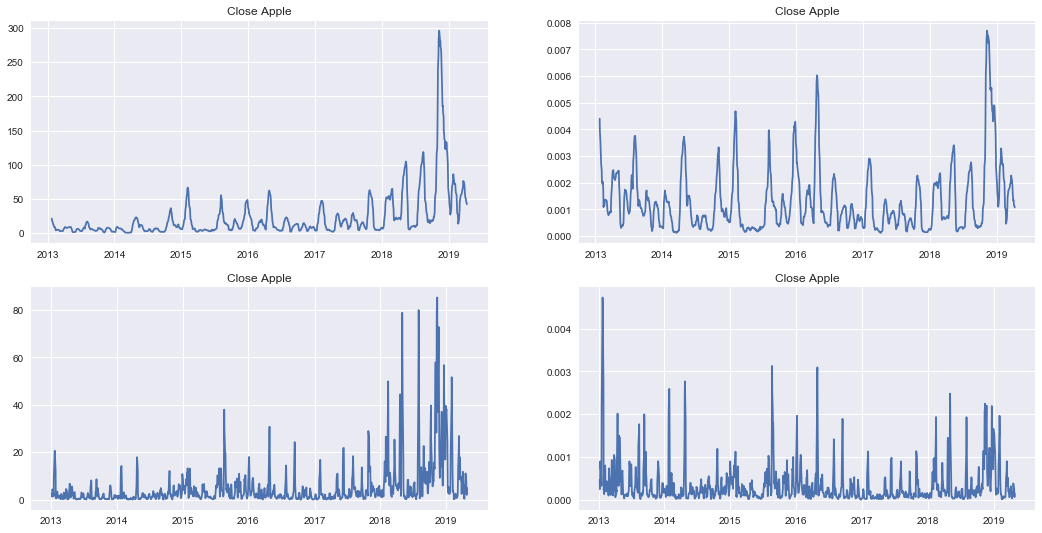

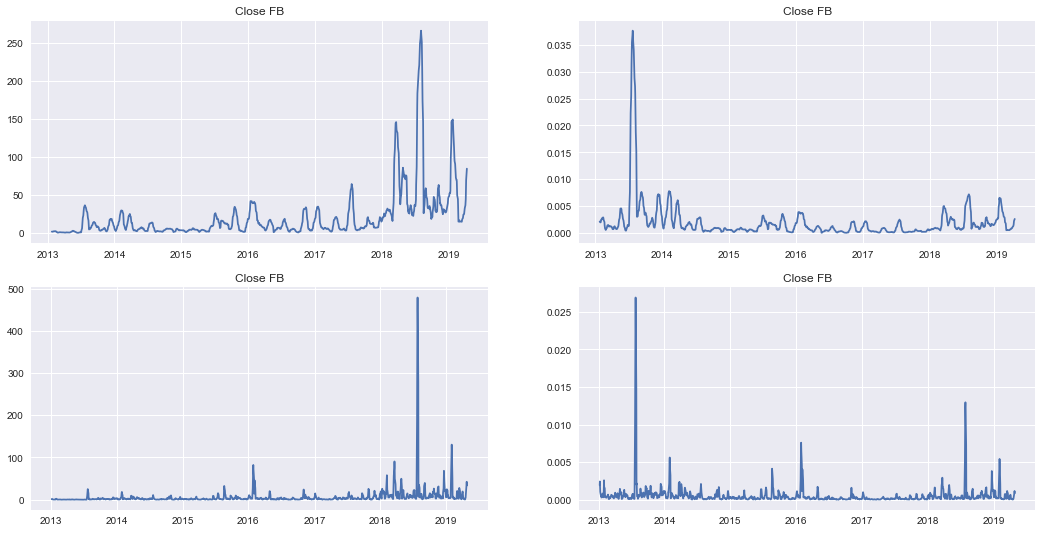

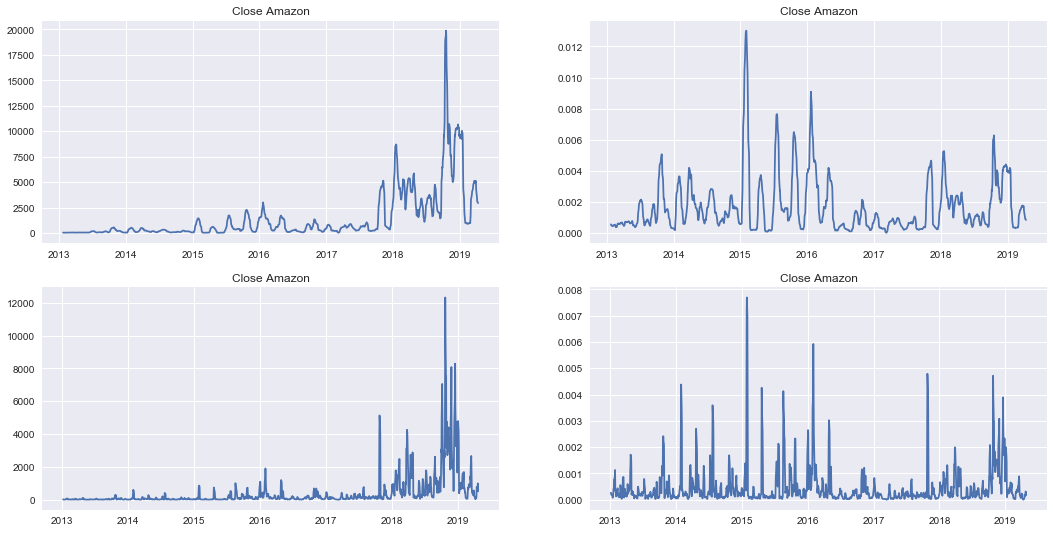

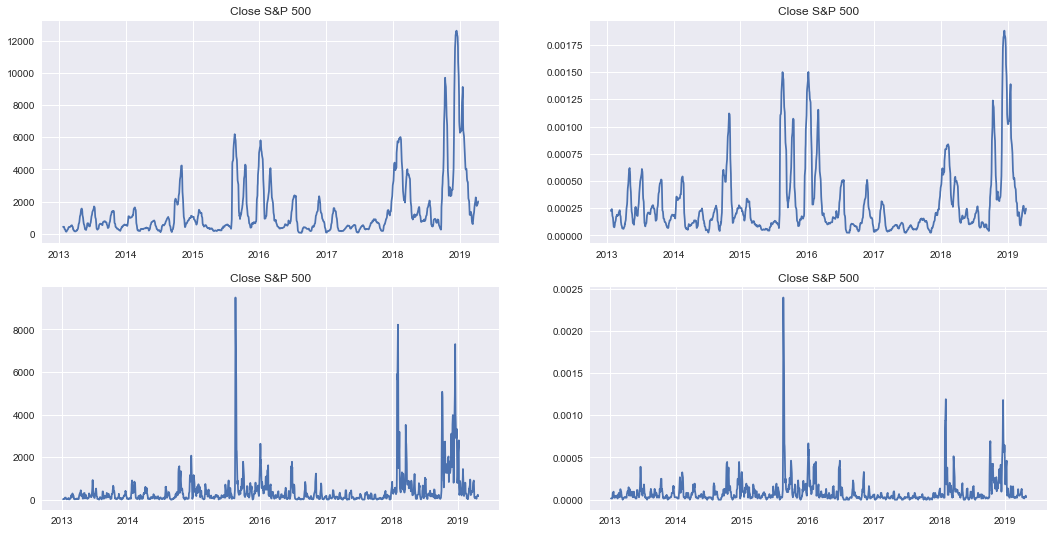

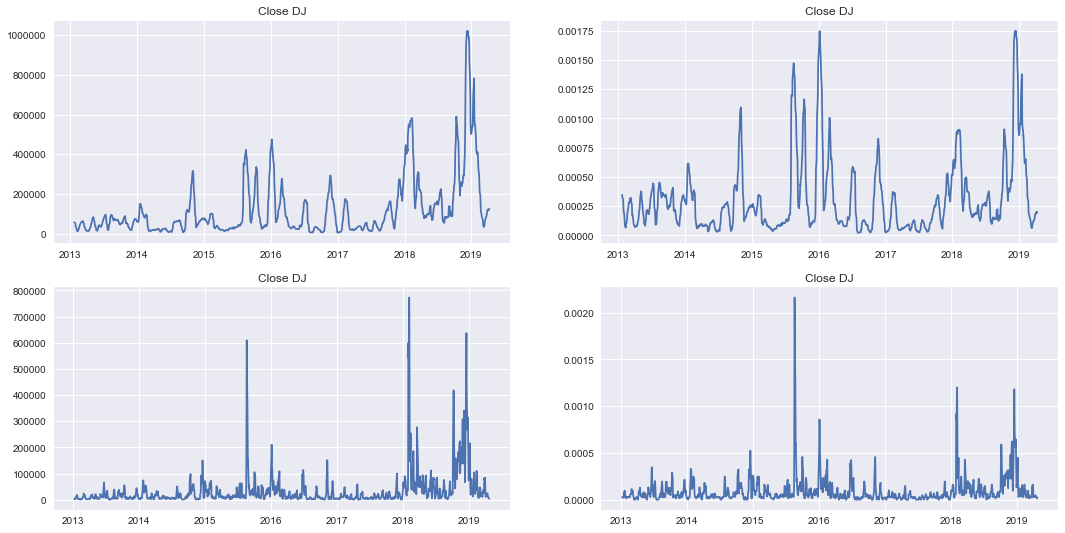

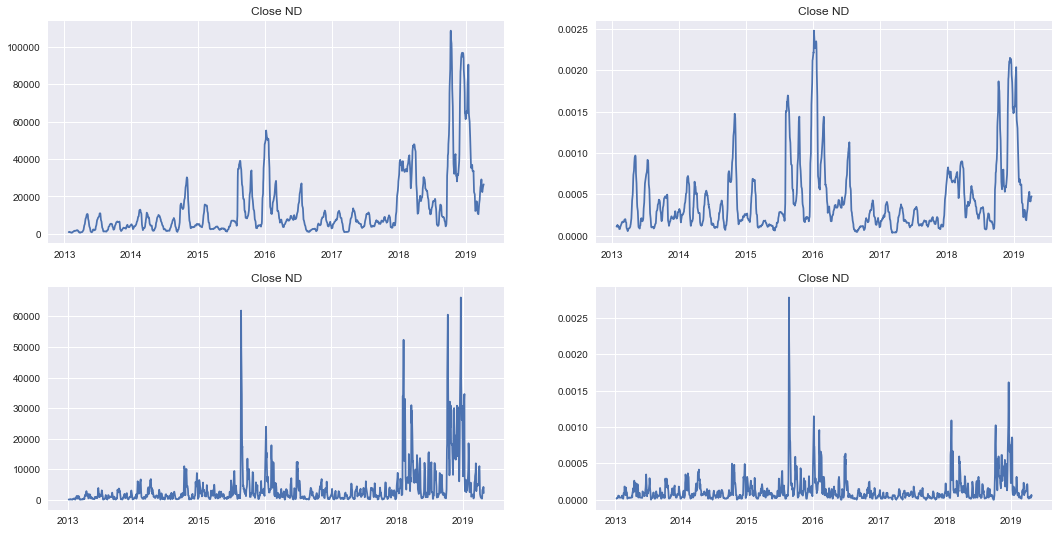

In [28]:
variance1_1 = df_close.rolling(30, center=True).var()
variance1_2 = df_close_log.rolling(30, center=True).var()

variance2_1 = df_close.rolling(7, center=True).var()
variance2_2 = df_close_log.rolling(7, center=True).var()

for close in df_close:
    plt.figure(figsize = (18,9))
    plt.subplot(2,2,1)
    plt.plot(variance1_1[close])
    plt.title(close)
    
    plt.subplot(2,2,2)
    plt.plot(variance1_2[close])
    plt.title(close)
    
    plt.subplot(2,2,3)
    plt.plot(variance2_1[close])
    plt.title(close)
    
    plt.subplot(2,2,4)
    plt.plot(variance2_2[close])
    plt.title(close)
    
    plt.show()

# QUESTION: how to correct titles?

# monthly rolling variance: norm values, log values
#weekly rolling variance: norm values, log values


comments

### 1.4. Market Capitalisation data
To complete GAFA analysis it is worth to look at its market capitalisation data which are supposd to be related to stock market performance.
Before start, let's download data.

- Data source: YChart, data are provided in csv format.
- Period choosen: 6 last years from 2013 till 2018 (full years) plus the beginning of 2019 (January-April) is added to make the analysis as more up to date as possible.
- Data are downloaded separately for each company.
- Column 'Data' is set as dataframe index and converted into datetime type.
- Features are renamed to facilitate further data manipulating.
- Downloaded data into Pandas DataFrame are checked with head method.


#### 1.4.1. Data download

In [29]:
# Google daily capitalisation data

df_G_cap = pd.read_csv('GOOG_market_cap_data.csv')
print(df_G_cap.shape)
df_G_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_G_cap.set_index('Period', inplace=True)
df_G_cap.index = pd.to_datetime(df_G_cap.index)
df_G_cap.rename(columns={'Market Cap':'Market Cap Google'}, inplace=True)
print(df_G_cap.head())


# Apple daily capitalisation data

df_AP_cap = pd.read_csv('AAPL_market_cap_data.csv')
print(df_AP_cap.shape)
df_AP_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_AP_cap.set_index('Period', inplace=True)
df_AP_cap.index = pd.to_datetime(df_AP_cap.index)
df_AP_cap.rename(columns={'Market Cap':'Market Cap APPLE'}, inplace=True)
print(df_AP_cap.head())


# Facebook daily capitalisation data

df_FB_cap = pd.read_csv('FB_market_cap_data.csv')
print(df_FB_cap.shape)
df_FB_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_FB_cap.set_index('Period', inplace=True)
df_FB_cap.index = pd.to_datetime(df_FB_cap.index)
df_FB_cap.rename(columns={'Market Cap':'Market Cap FB'}, inplace=True)
print(df_FB_cap.head())


# Amazon daily capitalisation data

df_AMZ_cap = pd.read_csv('AMZN_market_cap_data.csv')
print(df_AMZ_cap.shape)
df_AMZ_cap.sort_values(by = 'Period', ascending=True, inplace=True )
df_AMZ_cap.set_index('Period', inplace=True)
df_AMZ_cap.index = pd.to_datetime(df_AMZ_cap.index)
df_AMZ_cap.rename(columns={'Market Cap':'Market Cap AMZN'}, inplace=True)
print(df_AMZ_cap.head())

(1592, 2)
            Market Cap Google
Period                       
2013-01-02        238426.3057
2013-01-03        238564.7561
2013-01-04        243278.8851
2013-01-07        242217.3911
2013-01-08        241739.3847
(1592, 2)
            Market Cap APPLE
Period                      
2013-01-02       515560.3722
2013-01-03       509048.9501
2013-01-04       494873.3253
2013-01-07       491962.3066
2013-01-08       493286.3538
(1588, 2)
            Market Cap FB
Period                   
2013-01-02      66416.000
2013-01-03      65870.440
2013-01-04      68218.720
2013-01-07      69787.326
2013-01-08      68931.978
(1592, 2)
            Market Cap AMZN
Period                     
2013-01-02      116818.7400
2013-01-03      117349.9245
2013-01-04      117654.1000
2013-01-07      121880.4768
2013-01-08      120936.5200


<i>Data are downloaded correctly</i>

In [30]:
#Concatenate Market Capitalisation data

df_cap = pd.concat([df_G_cap, df_AP_cap, df_FB_cap, df_AMZ_cap], axis=1)
df_cap.head()

,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
Period,,,,
2013-01-02,238426.3057,515560.3722,66416.000,116818.7400
2013-01-03,238564.7561,509048.9501,65870.440,117349.9245
2013-01-04,243278.8851,494873.3253,68218.720,117654.1000
2013-01-07,242217.3911,491962.3066,69787.326,121880.4768
2013-01-08,241739.3847,493286.3538,68931.978,120936.5200


#### 1.4.2. First look at GAFA's market capitalisation

Let's visualise market capitalisation data for all four companies. To have a bigger picture data is plotted also with 3 months rolling window method applied. 

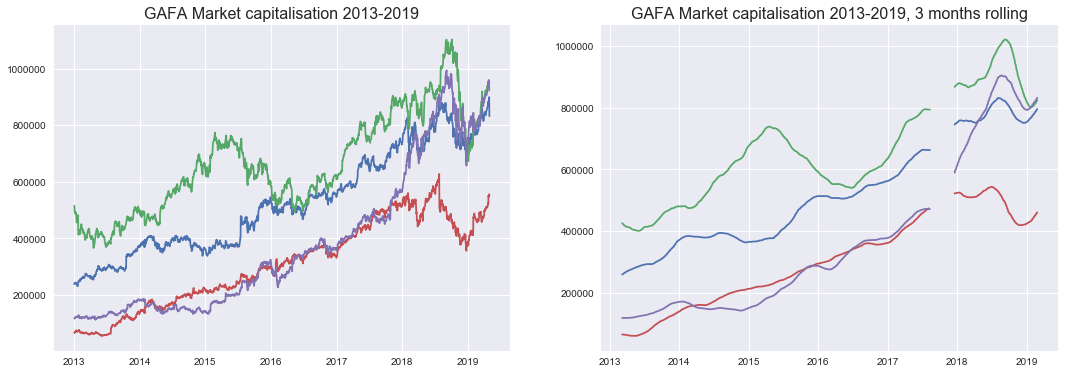

In [31]:
rolling_cap = df_cap.rolling(90, center=True).mean()

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))

ax1.plot(df_cap)
ax1.set_title('GAFA Market capitalisation 2013-2019', fontsize='16')

ax2.plot(rolling_cap)
ax2.set_title('GAFA Market capitalisation 2013-2019, 3 months rolling', fontsize='16');



Indeed, we can see that data pattern is pretty much the same as for stock data: there are a lot of fluctuations but with visible growth trend. On the right-hand side plot, data are plotted with 3 months rolling window, where trends are much more visible. There is also a 'hole' during 2017, apparently due to missing values. This is to be fixed later.

Let's visualise larger periods  of increase/decline

For further manipulations let's create a data frame with all data: close prices GAFA and idexes, volumes, market capitalisation 

#### 1.4.3. Correlation
Now it would be interesting to find out if there is a correlation between stock prices and market capitalisation.
Let's look for it

In [32]:
#select close data and market capitalisation data

df_close_cap = pd.concat([df_close, df_cap], axis=1)
df_close_cap.head()


,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
2013-01-02,359.288177,78.432854,28.000000,257.309998,1462.420044,13412.549805,3112.260010,238426.3057,515560.3722,66416.000,116818.7400
2013-01-03,359.496826,77.442856,27.770000,258.480011,1459.369995,13391.360352,3100.570068,238564.7561,509048.9501,65870.440,117349.9245
2013-01-04,366.600616,75.285713,28.760000,259.149994,1466.469971,13435.209961,3101.659912,243278.8851,494873.3253,68218.720,117654.1000
2013-01-07,365.001007,74.842857,29.420000,268.459991,1461.890015,13384.290039,3098.810059,242217.3911,491962.3066,69787.326,121880.4768
2013-01-08,364.280701,75.044289,29.059999,266.380005,1457.150024,13328.849609,3091.810059,241739.3847,493286.3538,68931.978,120936.5200


Calculate correlation and visualize it with a heat map

In [33]:
close_cap_corr = df_close_cap.corr()
close_cap_corr

,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
Close Google,1.000000,0.918166,0.956163,0.964089,0.964661,0.962045,0.972723,0.999289,0.862691,0.952884,0.962755
Close Apple,0.918166,1.000000,0.896824,0.914750,0.968071,0.957396,0.973662,0.919776,0.988773,0.895461,0.914490
Close FB,0.956163,0.896824,1.000000,0.880220,0.947224,0.917001,0.946314,0.962028,0.860616,0.999514,0.877334
Close Amazon,0.964089,0.914750,0.880220,1.000000,0.935301,0.953788,0.954722,0.959076,0.851109,0.877647,0.999940
Close S&P 500,0.964661,0.968071,0.947224,0.935301,1.000000,0.987862,0.995658,0.965309,0.937564,0.944474,0.934627
Close DJ,0.962045,0.957396,0.917001,0.953788,0.987862,1.000000,0.987590,0.958272,0.919361,0.913693,0.953911
Close ND,0.972723,0.973662,0.946314,0.954722,0.995658,0.987590,1.000000,0.972709,0.940418,0.943356,0.954086
Market Cap Google,0.999289,0.919776,0.962028,0.959076,0.965309,0.958272,0.972709,1.000000,0.865452,0.959241,0.957580
Market Cap APPLE,0.862691,0.988773,0.860616,0.851109,0.937564,0.919361,0.940418,0.865452,1.000000,0.859497,0.850588
Market Cap FB,0.952884,0.895461,0.999514,0.877647,0.944474,0.913693,0.943356,0.959241,0.859497,1.000000,0.874649


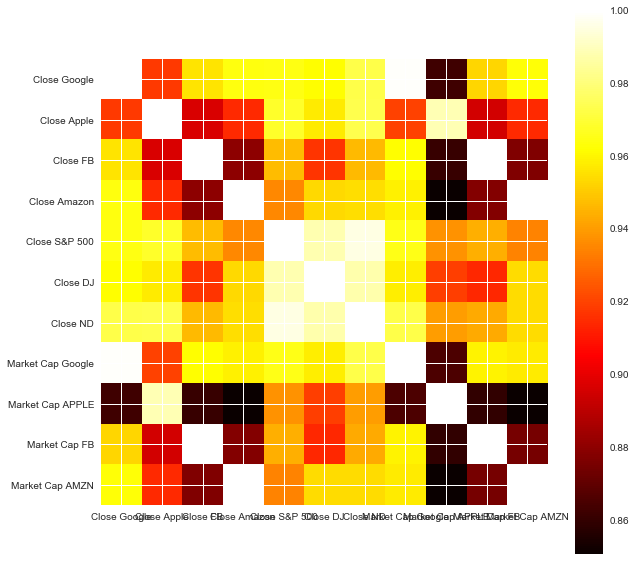

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(close_cap_corr, cmap='hot')
plt.colorbar()
plt.xticks(range(len(close_cap_corr)), close_cap_corr.columns)
plt.yticks(range(len(close_cap_corr)), close_cap_corr.columns);

Here we can see that for all four companies correlation between close data and market capitalisation is very high, at about 0.99. It means that stocks flustuations have immeidate effect to company market capitalisation.

As we did for close prices , lets look for correlation between percentage change

In [35]:
pers_close_cap = df_close_cap.pct_change()
pers_close_cap = pers_close_cap[1:] #drop first row in data set with NA values
close_cap_corr2 = pers_close_cap.corr()
close_cap_corr2

,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
Close Google,1.000000,0.417540,0.487478,0.590885,0.644561,0.581064,0.720293,0.992021,0.418325,0.486344,0.591041
Close Apple,0.417540,1.000000,0.329104,0.363710,0.560911,0.523573,0.641761,0.415297,0.992231,0.327050,0.362816
Close FB,0.487478,0.329104,1.000000,0.465260,0.469424,0.396478,0.566409,0.492213,0.332061,0.995051,0.465125
Close Amazon,0.590885,0.363710,0.465260,1.000000,0.572756,0.509009,0.660934,0.590844,0.366163,0.463844,0.999326
Close S&P 500,0.644561,0.560911,0.469424,0.572756,1.000000,0.965409,0.943427,0.645336,0.560984,0.466838,0.572287
Close DJ,0.581064,0.523573,0.396478,0.509009,0.965409,1.000000,0.870468,0.582254,0.521934,0.394682,0.508904
Close ND,0.720293,0.641761,0.566409,0.660934,0.943427,0.870468,1.000000,0.720459,0.641694,0.563779,0.660336
Market Cap Google,0.992021,0.415297,0.492213,0.590844,0.645336,0.582254,0.720459,1.000000,0.414541,0.491749,0.591343
Market Cap APPLE,0.418325,0.992231,0.332061,0.366163,0.560984,0.521934,0.641694,0.414541,1.000000,0.329816,0.364586
Market Cap FB,0.486344,0.327050,0.995051,0.463844,0.466838,0.394682,0.563779,0.491749,0.329816,1.000000,0.463898


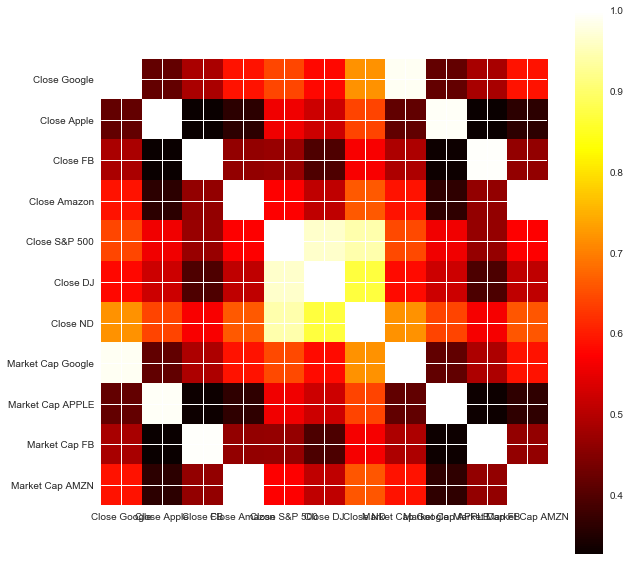

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(close_cap_corr2, cmap='hot')
plt.colorbar()
plt.xticks(range(len(close_cap_corr2)), close_cap_corr2.columns)
plt.yticks(range(len(close_cap_corr2)), close_cap_corr2.columns);

Here we can seee that correlation remains very high  in contrast with stock prices data ,where percentage changes correlations is lower

We've seen that there are some missing values in market capitalisation data. Let's fix and clean data.

### 1.5. Cleaning dataset

In [37]:
#Concatenate stock prices and capitalisation data frames

df = pd.concat([df, df_cap], axis=1)
print(df.shape)
df.tail()

(1593, 18)


,Close Google,Volume Google,Close Apple,Volume Apple,Close FB,Volume FB,Close Amazon,Volume Amazon,Close S&P 500,Volume S&P500,Close DJ,Volume DJ,Close ND,Volume ND,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
2019-04-24,1256.000000,1018800.0,207.160004,17540600.0,182.580002,37289900.0,1901.750000,3675800.0,2927.250000,3.448960e+09,26597.050781,283370000.0,8102.009766,2.022490e+09,874781.9002,953158.6970,521172.5468,936292.0006
2019-04-25,1263.449951,1107300.0,205.279999,18543200.0,193.259995,54148800.0,1902.250000,6099100.0,2926.169922,3.425280e+09,26462.080078,296730000.0,8118.680176,2.063270e+09,879842.9375,944508.6760,551658.4862,936538.1666
2019-04-26,1272.180054,1241400.0,204.300003,18649100.0,191.490005,22075000.0,1950.630005,8432600.0,2939.879883,3.248500e+09,26543.330078,317290000.0,8146.399902,1.971270e+09,886840.9150,939999.6225,546606.0412,960357.1790
2019-04-29,1287.579956,2499400.0,204.610001,22204700.0,194.779999,19641300.0,1938.430054,4021300.0,2943.030029,3.118780e+09,26554.390625,279450000.0,8161.850098,1.761110e+09,899878.8136,941425.9558,555997.3090,954350.7311
2019-04-30,1188.479980,6207000.0,200.669998,46534900.0,193.399994,23494700.0,1926.520020,3506000.0,2945.830078,3.919330e+09,26592.910156,340320000.0,8095.390137,2.115770e+09,832370.5464,923297.7202,552058.1146,948487.0593


In [38]:
print(df.shape)
print(df.info())
df.isnull().sum()

(1593, 18)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1593 entries, 2013-01-02 to 2019-04-30
Data columns (total 18 columns):
Close Google         1592 non-null float64
Volume Google        1592 non-null float64
Close Apple          1592 non-null float64
Volume Apple         1592 non-null float64
Close FB             1592 non-null float64
Volume FB            1592 non-null float64
Close Amazon         1592 non-null float64
Volume Amazon        1592 non-null float64
Close S&P 500        1592 non-null float64
Volume S&P500        1592 non-null float64
Close DJ             1592 non-null float64
Volume DJ            1592 non-null float64
Close ND             1592 non-null float64
Volume ND            1592 non-null float64
Market Cap Google    1592 non-null float64
Market Cap APPLE     1592 non-null float64
Market Cap FB        1588 non-null float64
Market Cap AMZN      1592 non-null float64
dtypes: float64(18)
memory usage: 236.5 KB
None


Close Google         1
Volume Google        1
Close Apple          1
Volume Apple         1
Close FB             1
Volume FB            1
Close Amazon         1
Volume Amazon        1
Close S&P 500        1
Volume S&P500        1
Close DJ             1
Volume DJ            1
Close ND             1
Volume ND            1
Market Cap Google    1
Market Cap APPLE     1
Market Cap FB        5
Market Cap AMZN      1
dtype: int64

In [39]:
# Look for missing values and localize it in dataset

df['Close Apple'][df['Close Apple'].isnull()]
df['Close Apple']['2017-10-12':'2017-10-16']

2017-10-12    156.000000
2017-10-13    156.990005
2017-10-14           NaN
2017-10-16    159.880005
Name: Close Apple, dtype: float64

In [40]:
# Look for NaN values in another column
df['Volume Amazon'][df['Volume Amazon'].isnull()]

2017-10-14   NaN
Name: Volume Amazon, dtype: float64

In [41]:
# Here we can see all missing values in data set
df['2017-10-06':'2017-10-16']

,Close Google,Volume Google,Close Apple,Volume Apple,Close FB,Volume FB,Close Amazon,Volume Amazon,Close S&P 500,Volume S&P500,Close DJ,Volume DJ,Close ND,Volume ND,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
2017-10-06,978.890015,1173900.0,155.300003,17407600.0,172.229996,13124500.0,989.580017,3782100.0,2549.330078,2.884570e+09,22773.669922,221450000.0,6590.180176,1.742470e+09,690371.1356,796099.0153,500500.38,476977.56
2017-10-09,977.000000,891400.0,155.839996,16262900.0,172.500000,14570400.0,990.989990,2938600.0,2544.729980,2.483970e+09,22761.070313,310770000.0,6579.729980,1.490620e+09,689447.0649,798867.1638,NaN,477657.18
2017-10-10,972.599976,968400.0,155.899994,15617000.0,171.589996,11341100.0,987.200012,3084900.0,2550.639893,2.960500e+09,22830.679688,319270000.0,6587.250000,1.799400e+09,686313.5620,799174.7359,NaN,475830.40
2017-10-11,989.250000,1693300.0,156.550003,16905600.0,172.740005,11283700.0,995.000000,2337100.0,2555.239990,2.976090e+09,22872.890625,316000000.0,6603.549805,1.830360e+09,698715.5635,802506.7666,NaN,479590.00
2017-10-12,987.830017,1262400.0,156.000000,16125100.0,172.550003,10351000.0,1000.929993,4067300.0,2550.929932,3.151510e+09,22841.009766,291790000.0,6591.509766,2.000470e+09,698715.5635,799687.3560,NaN,482448.26
2017-10-13,989.679993,1169800.0,156.990005,16394200.0,173.740005,13658300.0,1002.940002,2431500.0,2553.169922,3.149440e+09,22871.720703,259560000.0,6605.799805,1.756150e+09,700257.9973,804762.2950,NaN,483417.08
2017-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500500.38,NaN
2017-10-16,992.000000,910500.0,159.880005,24121500.0,174.520004,11498800.0,1006.340027,2008900.0,2557.639893,2.916020e+09,22956.960938,247180000.0,6624.000000,1.629480e+09,701286.2865,819577.0159,507155.12,485055.88


In [42]:
#fill in missing data in 'Market Cap_FB' column

df['Market Cap FB'].fillna(value=500500.38, inplace=True)
df['2017-10-06':'2017-10-16']['Market Cap FB']

2017-10-06    500500.38
2017-10-09    500500.38
2017-10-10    500500.38
2017-10-11    500500.38
2017-10-12    500500.38
2017-10-13    500500.38
2017-10-14    500500.38
2017-10-16    507155.12
Name: Market Cap FB, dtype: float64

In [43]:
#drop the row with NaN values
df.dropna(inplace=True)

#check if the row was deleted
df['2017-10-12':'2017-10-17']

,Close Google,Volume Google,Close Apple,Volume Apple,Close FB,Volume FB,Close Amazon,Volume Amazon,Close S&P 500,Volume S&P500,Close DJ,Volume DJ,Close ND,Volume ND,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
2017-10-12,987.830017,1262400.0,156.000000,16125100.0,172.550003,10351000.0,1000.929993,4067300.0,2550.929932,3.151510e+09,22841.009766,291790000.0,6591.509766,2.000470e+09,698715.5635,799687.3560,500500.38,482448.26
2017-10-13,989.679993,1169800.0,156.990005,16394200.0,173.740005,13658300.0,1002.940002,2431500.0,2553.169922,3.149440e+09,22871.720703,259560000.0,6605.799805,1.756150e+09,700257.9973,804762.2950,500500.38,483417.08
2017-10-16,992.000000,910500.0,159.880005,24121500.0,174.520004,11498800.0,1006.340027,2008900.0,2557.639893,2.916020e+09,22956.960938,247180000.0,6624.000000,1.629480e+09,701286.2865,819577.0159,507155.12,485055.88
2017-10-17,992.179993,1290200.0,160.470001,18997300.0,176.110001,15990100.0,1009.130005,2319700.0,2559.360107,2.889390e+09,22997.439453,273090000.0,6623.660156,1.647240e+09,702432.6900,822601.4745,511775.66,486400.66


In [44]:
#final check

df.isnull().sum().sum()

0

There is no more nul values in dataset

Let's continue analysis and look  at pattern of normalised data, maybe that could give more insights. And secondly, look for ROI - return of investment and GAFA's  market capitalsation growth.

### 1.6. Normalised data & ROI 

#### 1.6.1. Patterns of normalised data

To get normalised data MinMaxScaler method is used

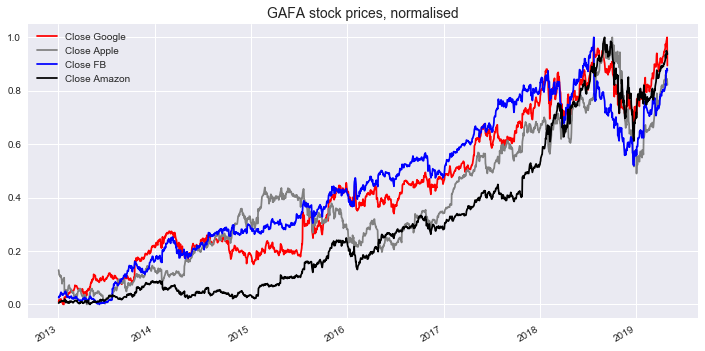

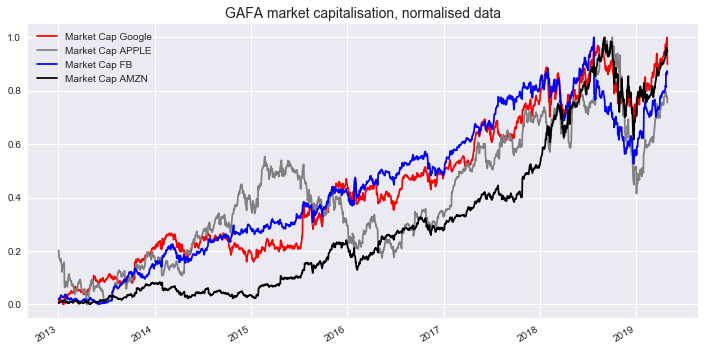

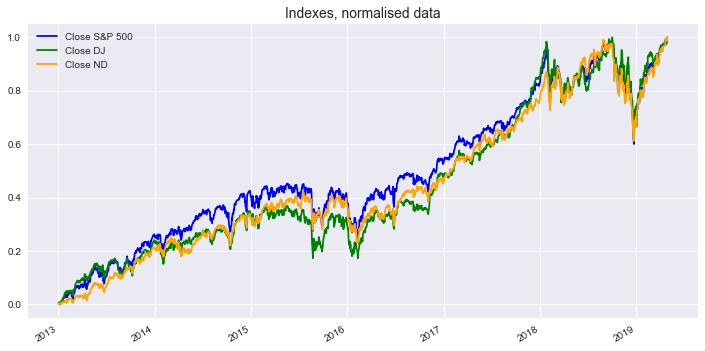

In [45]:
from sklearn.preprocessing import MinMaxScaler


values = df[['Close Google', 'Close Apple', 'Close FB', 'Close Amazon',
           'Close S&P 500', 'Close DJ', 'Close ND', 
            'Market Cap Google', 'Market Cap APPLE', 'Market Cap FB', 'Market Cap AMZN']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)

df_norm = pd.DataFrame(normalized, columns=['Close Google', 'Close Apple', 'Close FB', 'Close Amazon',
       'Close S&P 500', 'Close DJ', 'Close ND', 'Market Cap Google', 'Market Cap APPLE', 'Market Cap FB', 'Market Cap AMZN'], index=df.index)

df_norm.head()


stocks = df_norm[['Close Google', 'Close Apple', 'Close FB', 'Close Amazon']].plot(figsize=(12,6), color = ['red', 'grey', 'blue', 'black'] );
stocks.set_title('GAFA stock prices, normalised', fontsize=14);

capitalisation = df_norm[['Market Cap Google', 'Market Cap APPLE', 'Market Cap FB', 'Market Cap AMZN']].plot(figsize=(12,6), color = ['red', 'grey', 'blue', 'black']);
capitalisation .set_title('GAFA market capitalisation, normalised data', fontsize=14);

indexes = df_norm[['Close S&P 500', 'Close DJ', 'Close ND']].plot(figsize=(12,6), color = ['blue', 'green', 'orange']);
indexes.set_title('Indexes, normalised data', fontsize=14);




Pattern between stock prices data and market capitalisation asre pretty much the same. It confirms results that have bee got while correlation analysis.

As for Indexes data they have very similar pattern between them.

Let's now look at return on investments

#### 1.6.2. Return on investments
Before start, let's look at prices in 2013 and in 2019

In [46]:
df_close.head(3)

,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND
Date,,,,,,,
2013-01-02,359.288177,78.432854,28.00,257.309998,1462.420044,13412.549805,3112.260010
2013-01-03,359.496826,77.442856,27.77,258.480011,1459.369995,13391.360352,3100.570068
2013-01-04,366.600616,75.285713,28.76,259.149994,1466.469971,13435.209961,3101.659912


In [47]:
df_close.tail(3)

,Close Google,Close Apple,Close FB,Close Amazon,Close S&P 500,Close DJ,Close ND
Date,,,,,,,
2019-04-26,1272.180054,204.300003,191.490005,1950.630005,2939.879883,26543.330078,8146.399902
2019-04-29,1287.579956,204.610001,194.779999,1938.430054,2943.030029,26554.390625,8161.850098
2019-04-30,1188.479980,200.669998,193.399994,1926.520020,2945.830078,26592.910156,8095.390137


ROI is calculated as  = (30.04.2019 price - 01.01.2013 price) / 01.01.2013 price

In [48]:
roi_stocks = []

for close in df_close:
    roi = ((df_close[close][-1]-df_close[close][0])/df_close[close][0])*100
    
    roi_stocks.append(roi)

df_roi = pd.DataFrame(roi_stocks, columns=['ROI, %'],\
                      index=['Google', 'Apple', 'Facebook', 'Amazon', 'S&P 500','Dow Jones','NASDAQ'])

df_roi = df_roi.sort_values(by='ROI, %', ascending=False)
df_roi

,"ROI, %"
Amazon,648.715571
Facebook,590.714264
Google,230.787389
NASDAQ,160.112912
Apple,155.849415
S&P 500,101.435291
Dow Jones,98.268864


We can see that Amason and Facebook have the best results at about 650% and 590%. Let's plot it


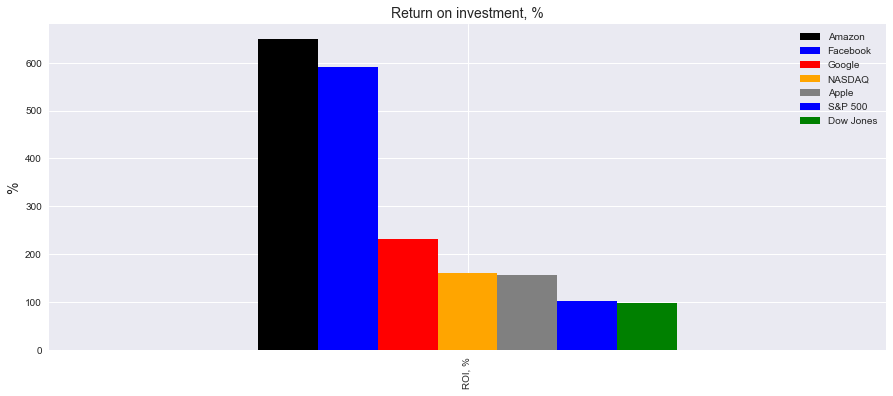

,Amazon,Facebook,Google,NASDAQ,Apple,S&P 500,Dow Jones
"ROI, %",648.715571,590.714264,230.787389,160.112912,155.849415,101.435291,98.268864


In [49]:
df_roi_t = df_roi.sort_values(by='ROI, %', ascending=False).T

roi_plot = df_roi_t.plot.bar(figsize=(15,6), \
                        color=['black', 'blue', 'red', 'orange', 'grey', 'blue', 'green'])
roi_plot.set_title('Return on investment, %', fontsize=14)
roi_plot.set_ylabel('%', fontsize=14)

plt.show()
df_roi_t 

Let's also compute one-year return on investments over the course of data set

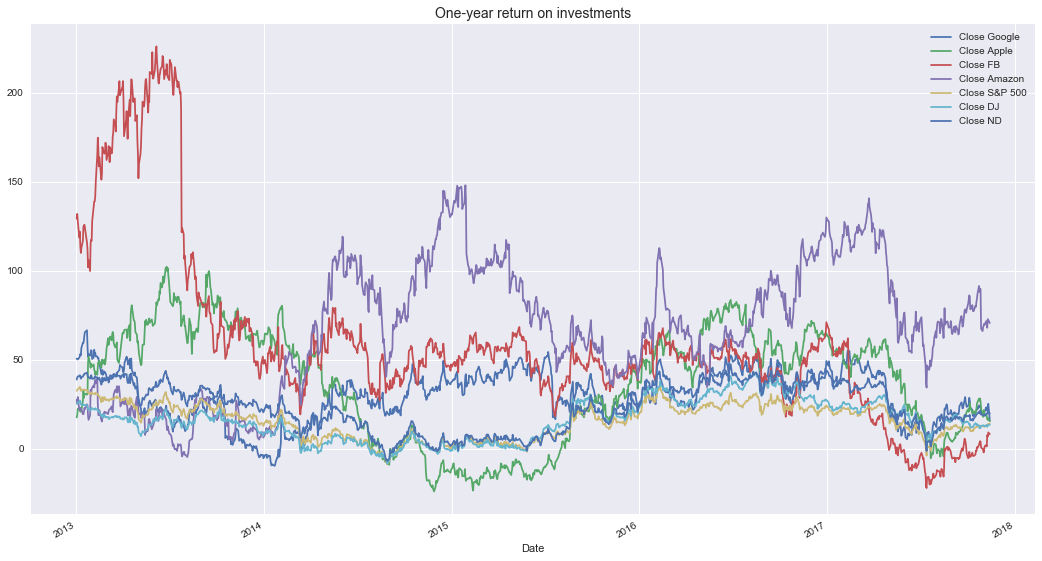

In [50]:
roi = 100*(df_close.shift(-365)/df_close-1)
roi_plot = roi.plot(figsize=(18,10))
roi_plot.set_title('One-year return on investments', fontsize=14);

Here we can see the most profitable periods to invest, for Facebook for example it was in 2013, for Amazon in the beginning of 2015, etc.

Now let's look what is market capitalisation growth

#### 1.6.3 Market capitalisation growth
Let's look at market capitalisation growth. Firstly to check data at the beginning of 2013 and then at the end of april 2019 

In [51]:
df_cap.head(3)

,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
Period,,,,
2013-01-02,238426.3057,515560.3722,66416.00,116818.7400
2013-01-03,238564.7561,509048.9501,65870.44,117349.9245
2013-01-04,243278.8851,494873.3253,68218.72,117654.1000


In [52]:
df_cap.tail(3)

,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN
Period,,,,
2019-04-26,886840.9150,939999.6225,546606.0412,960357.1790
2019-04-29,899878.8136,941425.9558,555997.3090,954350.7311
2019-04-30,832370.5464,923297.7202,552058.1146,948487.0593


Now let's calculate how much GAFA market capitalisation has changed duting this period, in percentage

,"Growth, %"
Google,249.110197
Apple,79.086247
Facebook,731.212531
Amazon,711.930568


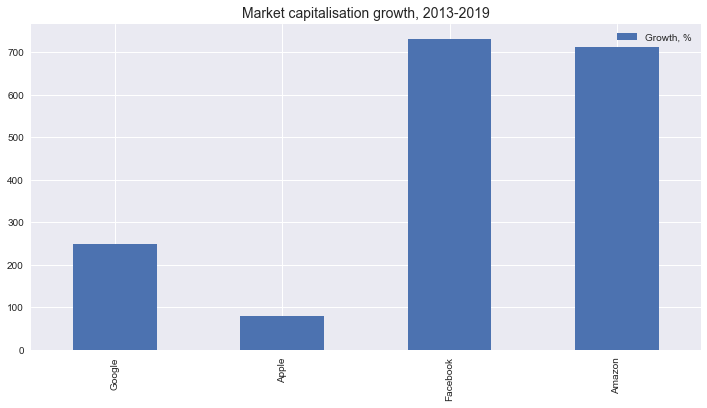

In [53]:
market_cap = []
for cap in df_cap:
    roi = ((df_cap[cap][-1]-df_cap[cap][0])/df_cap[cap][0])*100
    
    market_cap.append(roi)

df_market_cap = pd.DataFrame(market_cap,  index=['Google', 'Apple', 'Facebook', 'Amazon'], columns = ['Growth, %'])

market_cap_plot = df_market_cap.plot.bar(figsize=(12,6))
market_cap_plot.set_title('Market capitalisation growth, 2013-2019', fontsize=14 )
df_market_cap

Market capitalization for Facebook aand Amazon increased by 731% and 712% which is very impressive or about 8 times!
Market capitalisation for Google increased for about 250% which is also great result.
Market capitalization for Apple increased at about 80% or almost doubled.<p>

So as a conclusion it could be said that Facebook and Amazon have performed better than onthers with impressive results, stock prices increased at about 7 times and companies market capitalisation at about 8 times.

Now let's proceed with data cleaning as apparently as we've seen,  there is some missing values in dataset.


### 1.7. Internet and Mobile users data

Success of GAFA can be partly explained by growing popularity of Internet and mobile technologies. Number of Internet and mobile users have been growing constantly during last 10-15 years . To enlarge the vision of GAFA success and its performance let's look how number of Internet and mobile users changed during the analysed period (2013-2019).

It would also interesting to split users geographically by regions and see the difference between them.

#### 1.7.1. Download and transpose the dara

Data source for this analysis is International Telecommunications Union (https://www.itu.int/en/ITU-D/Statistics/Pages/default.aspx) which is provided in csv format.

In [54]:
#Internet users in the world by regions, millions

df_web = pd.read_excel('InternetUsers.xlsx', sheet_name='Internet_users')
df_web = df_web.iloc[:,7:].round(2)
df_web.head()


,2012,2013,2014,2015,2016,2017,2018*
Africa,85.26,107.24,131.83,163.79,190.11,213.33,242
Arab States,106.31,120.22,135.37,150.92,162.08,172.69,196
Asia & Pacific,1109.67,1239.01,1397.24,1552.23,1696.88,1813.02,1943
CIS,139.13,153.45,162.95,173.66,183.16,190.62,200
Europe,434.35,446.87,461.31,472.27,489.94,501.04,520


Here we downloaded file with number of Internet users by regions. Data are provided on yearly basis, 2018 figures are an estimation.

<i><font, size=2>CIS - The Commonwealth of Independent States (CIS) is a regional intergovernmental organization of 10 post-Soviet republics in Eurasia formed following the dissolution of the Soviet Union. It has an area of 20,368,759 km² (8,097,484 sq mi) and has an estimated population of 239,796,010.<br>
Source: https://en.wikipedia.org/wiki/Commonwealth_of_Independent_States</i></font>


Let's download data for mobile users.

In [55]:
#Mobile users in the world by regions, millions

df_mob = pd.read_excel('InternetUsers.xlsx', sheet_name='Mobile_subsriptions')
df_mob = df_mob.iloc[:,7:].round(2)
df_mob.head()

,2012,2013,2014,2015,2016,2017,2018*
Africa,510.18,580.90,643.55,714.16,713.56,744.21,781.12
Arab States,381.64,407.70,415.03,417.20,415.56,422.70,435.61
Asia & Pacific,3234.35,3463.40,3680.55,3778.08,4093.94,4350.91,4625.94
CIS,305.51,318.85,323.19,328.61,332.37,333.42,331.19
Europe,800.41,813.83,809.37,807.16,809.58,811.14,814.81


Donwloaded data are of the same structure as for internet users. They are provided on yearly basis with an estimation for 2018.

To facilitate further analysis let's transpose both data frames, so thy are in the same format as data frames we used before, where years (dates) are index.

In [56]:
#Transpose dataset, Internet users

df_web_new = df_web.T
df_web_new

,Africa,Arab States,Asia & Pacific,CIS,Europe,The Americas
2012,85.26,106.31,1109.67,139.13,434.35,526.12
2013,107.24,120.22,1239.01,153.45,446.87,540.60
2014,131.83,135.37,1397.24,162.95,461.31,566.78
2015,163.79,150.92,1552.23,173.66,472.27,612.23
2016,190.11,162.08,1696.88,183.16,489.94,637.05
2017,213.33,172.69,1813.02,190.62,501.04,661.90
2018*,242.00,196.00,1943.00,200.00,520.00,688.00


In [57]:
#Transpose dataset, mobile users

df_mob_new = df_mob.T
df_mob_new

,Africa,Arab States,Asia & Pacific,CIS,Europe,The Americas
2012,510.18,381.64,3234.35,305.51,800.41,994.92
2013,580.90,407.70,3463.40,318.85,813.83,1042.98
2014,643.55,415.03,3680.55,323.19,809.37,1092.86
2015,714.16,417.20,3778.08,328.61,807.16,1102.60
2016,713.56,415.56,4093.94,332.37,809.58,1113.91
2017,744.21,422.70,4350.91,333.42,811.14,1119.54
2018*,781.12,435.61,4625.94,331.19,814.81,1139.92


#### 1.7.2. Exploratory analysis
Now let's visualize data to get a first idea about it.

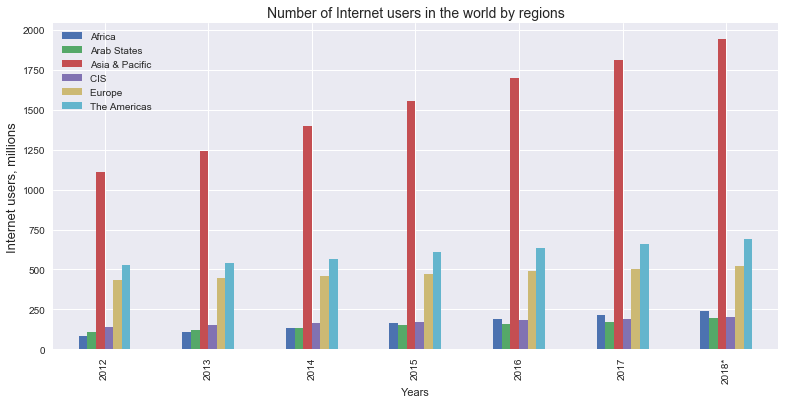

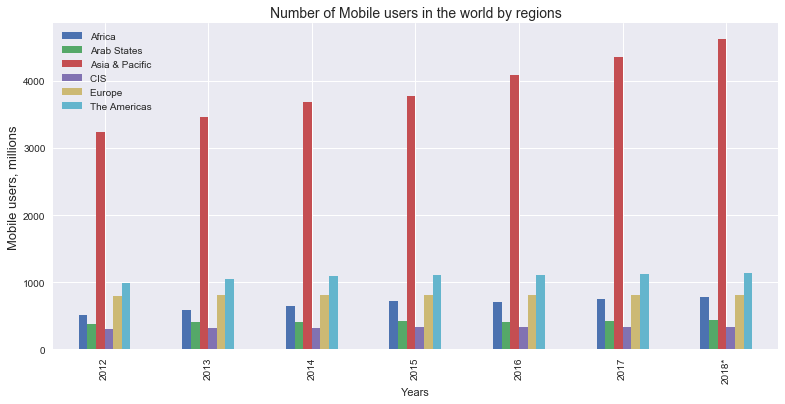

In [58]:
#Visualize dataset - Mobile Users in the world, by regions

web_plot = df_web_new.plot.bar(figsize=(13,6))
web_plot.set_title('Number of Internet users in the world by regions', fontsize=14)
web_plot.set_ylabel('Internet users, millions', fontsize=13)
web_plot.set_xlabel('Years')

mob_plot = df_mob_new.plot.bar(figsize=(13,6))
mob_plot.set_title('Number of Mobile users in the world by regions', fontsize=14)
mob_plot.set_ylabel('Mobile users, millions', fontsize=13)
mob_plot.set_xlabel('Years')
plt.show()


Here we can see a visible trend for increasing of number of Internet and mobile users. This is the case for each region. We can see as well that the biggest region in terms of number of users is Asia & Pasific. 

To see more in detail every region and its 'part', let's visualise data in a stacked plots

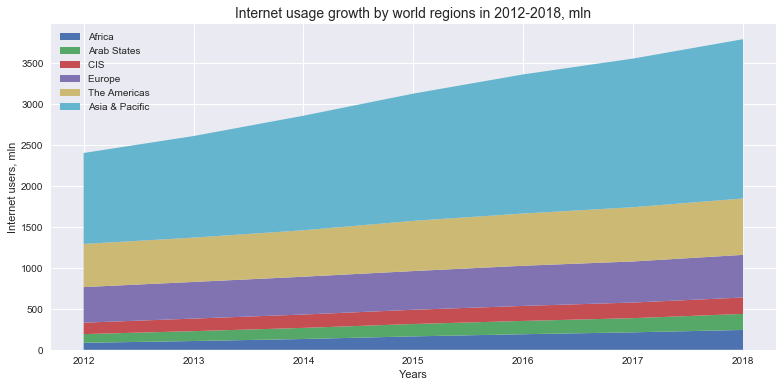

In [59]:
#Visualize dataset, Internet Users 

x = [2012,2013,2014,2015,2016,2017,2018]

fig, ax = plt.subplots(figsize=(13, 6))

labels = ['Africa ', 'Arab States ', 'CIS ', 'Europe ',   'The Americas ', 'Asia & Pacific ']
ax.stackplot(x, df_web_new['Africa '], df_web_new['Arab States '], df_web_new['CIS '], df_web_new['Europe '], 
             df_web_new['The Americas '], df_web_new['Asia & Pacific '], labels = labels )

ax.legend(loc='upper left')
plt.title('Internet usage growth by world regions in 2012-2018, mln', fontsize=14)
plt.ylabel('Internet users, mln')
plt.xlabel('Years')

plt.show()


Here we can see more clear the trend for growth as well as a share of each region. The largest one is Asia & Pacific, then the Americas and Europe and three smaller regions in terms of number of users which are: CIS, Arab States and Africa.

Europe's and Americas's shares are quite steady that can be explaned by high penetration of Internet in these countries; while Asia and Africa's ones have visible trend to growth which can significate that level of Internet penetration is not achieved its maximum and there is a potentils for further internet users growth.


Let's plot in the same manner data for mobile users

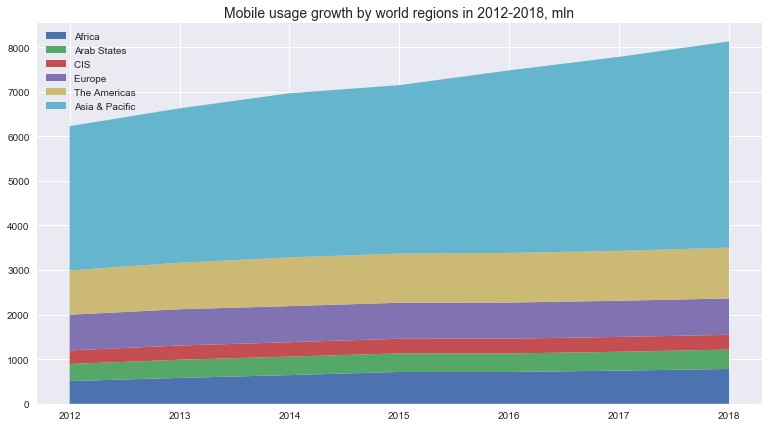

In [60]:
#Visualize dataset - Mobile Users in the world, by regions -2 

x = [2012,2013,2014,2015,2016,2017,2018]


fig, ax = plt.subplots(figsize=(13, 7))

labels = ['Africa ', 'Arab States ', 'CIS ', 'Europe ',   'The Americas ', 'Asia & Pacific ']
ax.stackplot(x, df_mob_new['Africa '], df_mob_new['Arab States '], df_mob_new['CIS '], df_mob_new['Europe '], 
             df_mob_new['The Americas '], df_mob_new['Asia & Pacific '], labels = labels )

ax.legend(loc='upper left')
plt.title('Mobile usage growth by world regions in 2012-2018, mln', fontsize=14)

plt.show()

Here we can see the same pattern as above, however it can be stated that there is significant difference in absolute numbers of users: number of mobile users is significantly higher.

#### 1.7.3. Mobile users & Internet users data manipulating

To use this data in further predictive analysis it is necessary to realize some manipulations in order they are of the same cardinality as stock market data. So it should be transformed from yearly scale to daily scale. It could be achieved by adding intermediate values using polyfit and polyval methods.

In [61]:
df_mob_new['Number'] = [1,2,3,4,5,6,7]
df_mob_new

,Africa,Arab States,Asia & Pacific,CIS,Europe,The Americas,Number
2012,510.18,381.64,3234.35,305.51,800.41,994.92,1
2013,580.90,407.70,3463.40,318.85,813.83,1042.98,2
2014,643.55,415.03,3680.55,323.19,809.37,1092.86,3
2015,714.16,417.20,3778.08,328.61,807.16,1102.60,4
2016,713.56,415.56,4093.94,332.37,809.58,1113.91,5
2017,744.21,422.70,4350.91,333.42,811.14,1119.54,6
2018*,781.12,435.61,4625.94,331.19,814.81,1139.92,7


In [62]:
x = df_mob_new.Number.values

def y_values(y):
    coefs = np.polyfit(x,y,deg=1)
    y_values = np.polyval(coefs, (np.linspace(x.min(), x.max(), num=1592))) #cardinality of stock market data set
    return y_values

Asia_mob_users = y_values(df_mob_new['Asia & Pacific '].values)
Africa__mob_users = y_values(df_mob_new['Africa '].values)
Arab_States__mob_users = y_values(df_mob_new['Arab States '].values)
CIS__mob_users = y_values(df_mob_new['CIS '].values)
Europe__mob_users = y_values(df_mob_new['Europe '].values)
Americas__mob_users = y_values(df_mob_new['The Americas '].values)



With the code above missing values were generated. Now let's add it to main data set

In [63]:
df['Asia_mob_users'] = Asia_mob_users.round(1)
df['Africa__mob_users'] = Africa__mob_users.round(1)
df['Arab_States__mob_users'] = Arab_States__mob_users.round(1)
df['CIS__mob_users'] = CIS__mob_users.round(1)
df['Europe__mob_users'] = Europe__mob_users.round(1)
df['Americas__mob_users'] = Americas__mob_users.round(1)
print(df.shape)
df.head(5)


(1592, 24)


,Close Google,Volume Google,Close Apple,Volume Apple,Close FB,Volume FB,Close Amazon,Volume Amazon,Close S&P 500,Volume S&P500,...,Market Cap Google,Market Cap APPLE,Market Cap FB,Market Cap AMZN,Asia_mob_users,Africa__mob_users,Arab_States__mob_users,CIS__mob_users,Europe__mob_users,Americas__mob_users
2013-01-02,359.288177,5115500.0,78.432854,140129500.0,28.000000,69846400.0,257.309998,3271000.0,1462.420044,4.202600e+09,...,238426.3057,515560.3722,66416.000,116818.7400,3207.8,540.1,393.0,312.4,805.4,1021.4
2013-01-03,359.496826,4666500.0,77.442856,88241300.0,27.770000,63140600.0,258.480011,2750900.0,1459.369995,3.829730e+09,...,238564.7561,509048.9501,65870.440,117349.9245,3208.7,540.2,393.0,312.4,805.4,1021.5
2013-01-04,366.600616,5562800.0,75.285713,148583400.0,28.760000,72715400.0,259.149994,1874200.0,1466.469971,3.424290e+09,...,243278.8851,494873.3253,68218.720,117654.1000,3209.5,540.4,393.1,312.4,805.4,1021.6
2013-01-07,365.001007,3332900.0,74.842857,121039100.0,29.420000,83781800.0,268.459991,4910000.0,1461.890015,3.304970e+09,...,242217.3911,491962.3066,69787.326,121880.4768,3210.4,540.6,393.1,312.4,805.4,1021.7
2013-01-08,364.280701,3373900.0,75.044289,114676800.0,29.059999,45871300.0,266.380005,3010700.0,1457.150024,3.601600e+09,...,241739.3847,493286.3538,68931.978,120936.5200,3211.3,540.7,393.1,312.4,805.4,1021.7


The same approach is applied to generate values on daily basis for Internet users data

In [64]:
df_web_new['Number'] = [1,2,3,4,5,6,7]
df_web_new

,Africa,Arab States,Asia & Pacific,CIS,Europe,The Americas,Number
2012,85.26,106.31,1109.67,139.13,434.35,526.12,1
2013,107.24,120.22,1239.01,153.45,446.87,540.60,2
2014,131.83,135.37,1397.24,162.95,461.31,566.78,3
2015,163.79,150.92,1552.23,173.66,472.27,612.23,4
2016,190.11,162.08,1696.88,183.16,489.94,637.05,5
2017,213.33,172.69,1813.02,190.62,501.04,661.90,6
2018*,242.00,196.00,1943.00,200.00,520.00,688.00,7


In [65]:
x = df_web_new.Number.values

def y_values_web(y):
    coefs = np.polyfit(x,y,deg=1)
    y_values_web = np.polyval(coefs, (np.linspace(x.min(), x.max(), num=1592)))
    return y_values_web

Asia_web_users = y_values_web(df_web_new['Asia & Pacific '].values)
Africa__web_users = y_values_web(df_web_new['Africa '].values)
Arab_States__web_users = y_values_web(df_web_new['Arab States '].values)
CIS__web_users = y_values_web(df_web_new['CIS '].values)
Europe__web_users = y_values_web(df_web_new['Europe '].values)
Americas__web_users = y_values_web(df_web_new['The Americas '].values)


With the code above missing values were generated. Now they are added to main data set

In [66]:
df['Asia_web_users'] = Asia_web_users.round(1)
df['Africa__web_users'] = Africa__web_users.round(1)
df['Arab_States__web_users'] = Arab_States__web_users.round(1)
df['CIS__web_users'] = CIS__web_users.round(1)
df['Europe__web_users'] = Europe__web_users.round(1)
df['Americas__web_users'] = Americas__web_users.round(1)
df.tail(5)

,Close Google,Volume Google,Close Apple,Volume Apple,Close FB,Volume FB,Close Amazon,Volume Amazon,Close S&P 500,Volume S&P500,...,Arab_States__mob_users,CIS__mob_users,Europe__mob_users,Americas__mob_users,Asia_web_users,Africa__web_users,Arab_States__web_users,CIS__web_users,Europe__web_users,Americas__web_users
2019-04-24,1256.000000,1018800.0,207.160004,17540600.0,182.580002,37289900.0,1901.750000,3675800.0,2927.250000,3.448960e+09,...,434.1,337.0,813.5,1151.6,1956.7,240.9,191.8,201.4,517.1,689.8
2019-04-25,1263.449951,1107300.0,205.279999,18543200.0,193.259995,54148800.0,1902.250000,6099100.0,2926.169922,3.425280e+09,...,434.2,337.0,813.5,1151.7,1957.2,241.0,191.9,201.4,517.2,689.9
2019-04-26,1272.180054,1241400.0,204.300003,18649100.0,191.490005,22075000.0,1950.630005,8432600.0,2939.879883,3.248500e+09,...,434.2,337.1,813.5,1151.8,1957.8,241.1,191.9,201.5,517.2,690.0
2019-04-29,1287.579956,2499400.0,204.610001,22204700.0,194.779999,19641300.0,1938.430054,4021300.0,2943.030029,3.118780e+09,...,434.2,337.1,813.5,1151.9,1958.3,241.2,192.0,201.5,517.3,690.1
2019-04-30,1188.479980,6207000.0,200.669998,46534900.0,193.399994,23494700.0,1926.520020,3506000.0,2945.830078,3.919330e+09,...,434.3,337.1,813.5,1151.9,1958.8,241.3,192.0,201.5,517.3,690.2


Here it is main data set with Internet users and mobile users data. Let's do a final check 

In [67]:
#check data frame

print('DataFrame shape:', df.shape)
print('Null values in data frame:',df.isnull().sum().sum())
df.index = pd.to_datetime(df.index)
df.head()

DataFrame shape: (1592, 30)
Null values in data frame: 0


,Close Google,Volume Google,Close Apple,Volume Apple,Close FB,Volume FB,Close Amazon,Volume Amazon,Close S&P 500,Volume S&P500,...,Arab_States__mob_users,CIS__mob_users,Europe__mob_users,Americas__mob_users,Asia_web_users,Africa__web_users,Arab_States__web_users,CIS__web_users,Europe__web_users,Americas__web_users
2013-01-02,359.288177,5115500.0,78.432854,140129500.0,28.000000,69846400.0,257.309998,3271000.0,1462.420044,4.202600e+09,...,393.0,312.4,805.4,1021.4,1112.9,82.6,106.2,142.2,432.9,519.1
2013-01-03,359.496826,4666500.0,77.442856,88241300.0,27.770000,63140600.0,258.480011,2750900.0,1459.369995,3.829730e+09,...,393.0,312.4,805.4,1021.5,1113.4,82.7,106.2,142.2,433.0,519.2
2013-01-04,366.600616,5562800.0,75.285713,148583400.0,28.760000,72715400.0,259.149994,1874200.0,1466.469971,3.424290e+09,...,393.1,312.4,805.4,1021.6,1114.0,82.8,106.3,142.2,433.0,519.3
2013-01-07,365.001007,3332900.0,74.842857,121039100.0,29.420000,83781800.0,268.459991,4910000.0,1461.890015,3.304970e+09,...,393.1,312.4,805.4,1021.7,1114.5,82.9,106.3,142.3,433.1,519.4
2013-01-08,364.280701,3373900.0,75.044289,114676800.0,29.059999,45871300.0,266.380005,3010700.0,1457.150024,3.601600e+09,...,393.1,312.4,805.4,1021.7,1115.0,83.0,106.4,142.3,433.1,519.5


After exploratory data analysis let's move to the predictive part of projet

## PART II. Predictive analysis